# 문제정의

에어비앤비 신규 호스트를 위해, 새로 런칭되는 숙소의 가격은 얼마가 적당할까?

가설. 

# 1. 모듈

In [1]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0
!pip install folium
!pip3 install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 2.1 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 690 kB 40.0 MB/s 
     |████████████████████████████████| 303 kB 36.9 MB/s 
     |████████████████████████████████| 62 kB 669 kB/s 
     |████████████████████████████████| 3.1 MB 42.3 MB/s 
     |████████████████████████████████| 296 kB 39.0 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=75e453b86db50e514ea2478398f784da8e96083ab3554ab0d4885ee9929567d3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing instal

In [2]:
!pip install eli5
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 2.1 MB/s 
     |████████████████████████████████| 133 kB 28.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3655ae727a83bb7dff0f7654138241283bee8671cd95bd373842b1c0adbf283a
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

In [1]:
import pandas as pd
import csv
from pandas_profiling import ProfileReport
import folium
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2. EDA, Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
f = open('/content/drive/MyDrive/airbnb-listings.csv', encoding='utf8')
reader = csv.reader(f)
csv_list = []

for i in reader:
  csv_list.append(i)
f.close()
log_df = pd.DataFrame(csv_list)
log_df
"""

"\nf = open('/content/drive/MyDrive/airbnb-listings.csv', encoding='utf8')\nreader = csv.reader(f)\ncsv_list = []\n\nfor i in reader:\n  csv_list.append(i)\nf.close()\nlog_df = pd.DataFrame(csv_list)\nlog_df\n"

In [3]:
df = pd.read_csv('/content/drive/MyDrive/airbnb-listings.csv', sep=';')

In [86]:
df_rent = pd.read_csv('/content/drive/MyDrive/logement-encadrement-des-loyers.csv', sep=';')
df_rent.head()

Année  Secteurs géographiques  Numéro du quartier  Nom du quartier  \
0   2021                      11                  71      Goutte-d'Or   
1   2021                      10                  55  Petit-Montrouge   
2   2021                      10                  67      Batignolles   
3   2021                      14                  76           Combat   
4   2021                      11                  43         Roquette   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             1              1971-1990       non meublé   
1                             4              1946-1970           meublé   
2                             4             Apres 1990           meublé   
3                             1              1971-1990           meublé   
4                             2              1971-1990       non meublé   

   Loyers de référence  Loyers de référence majorés  \
0                 26.0                        31.20   
1                 22.7                        27.24   
2                 26.6                        31.92   
3                 26.3                        31.56   
4                 23.3                        27.96   

   Loyers de référence minorés  Ville  Numéro INSEE du quartier  \
0                        18.20  PARIS                   7511871   
1                        15.89  PARIS                   7511455   
2                        18.62  PARIS                   7511767   
3                        18.41  PARIS                   7511976   
4                        16.31  PARIS                   7511143   

                                           geo_shape  \
0  {"coordinates": [[[2.349667597643656, 48.88373...   
1  {"coordinates": [[[2.329136731859957, 48.83412...   
2  {"coordinates": [[[2.317210277038245, 48.89025...   
3  {"coordinates": [[[2.388343313526396, 48.88056...   
4  {"coordinates": [[[2.379720818886926, 48.85344...   

                            geo_point_2d  
0   48.89213818760239,2.3555361632962777  
1  48.826652625543865,2.3264369992248985  
2    48.88848151392056,2.313856169006362  
3  48.878639075724855,2.3801272818292953  
4   48.857064040831055,2.380364061726766

In [5]:
df.shape

(494954, 89)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

ID                            Listing Url       Scrape ID  \
0  15802051  https://www.airbnb.com/rooms/15802051  20170304065726   
1  14751869  https://www.airbnb.com/rooms/14751869  20170304065726   
2   8901485   https://www.airbnb.com/rooms/8901485  20170304065726   
3   5832248   https://www.airbnb.com/rooms/5832248  20170304065726   
4   8049784   https://www.airbnb.com/rooms/8049784  20170304065726   

  Last Scraped                                        Name  \
0   2017-03-05                 Large double available now.   
1   2017-03-05  Spacious 4BR home near Brixton and Clapham   
2   2017-03-05                     quirky room with a view   
3   2017-03-05          Lovely 2r flat in the ❤ of Brixton   
4   2017-03-05              Lovely bedroom in a cosy house   

                                             Summary  \
0                              Double room available   
1  My home is a large four bedroom space set over...   
2  Quirky and well decorated bedroom in waterloo ...   
3  Perfectly located flat in the up and coming Br...   
4  Very nice double room in a clean and friendly ...   

                                               Space  \
0                                                NaN   
1  This is a bright, tidy, and spacious home in a...   
2  Your room is a living area that converts into ...   
3  The apartment is big, spacy and very bright wi...   
4  All you need in the kitchen for a delicious br...   

                                         Description Experiences Offered  \
0                              Double room available                none   
1  My home is a large four bedroom space set over...                none   
2  Quirky and well decorated bedroom in waterloo ...                none   
3  Perfectly located flat in the up and coming Br...                none   
4  Very nice double room in a clean and friendly ...                none   

                               Neighborhood Overview  \
0                                                NaN   
1  Both Brixton and Clapham are very trendy areas...   
2  the location is amazing, walk straight out ont...   
3  Brixton is the up and coming neighborhood of L...   
4  Safety, close shops and very good transport li...   

                                               Notes  \
0                                                NaN   
1  Please note: our standard check in times are b...   
2                                                NaN   
3  The apartment have 2 double beds. We have 2 ex...   
4  Three weeks ago I got my first little dog! His...   

                                             Transit  \
0                                                NaN   
1  My place is about a 15 minute walk from both t...   
2  Bus stop right outside the front door and Wate...   
3  Brixton is well connected to all of London. Th...   
4                 Yes, trains, underground and buses   

                                              Access  \
0                                                NaN   
1  Guests have complete access to the entire flat...   
2  whole house apart from secondary bedroom where...   
3       You will have access to the whole apartment.   
4  The whole house - sitting room, kitchen, bathr...   

                                         Interaction  \
0                                                NaN   
1  When I’m not there, you will be hosted by a pr...   
2  Host will be avalible up until 2pm and after 1...   
3  You will be welcomed and have any information ...   
4                          As often as they want to.   

                                         House Rules  \
0                                                NaN   
1  Please note our house rules:  -All guests are ...   
2  We dont mind what you do within reason, respec...   
3  Basic respect to the property and its contents...   
4                    Feel at home but keep it clean!   

                                       Thumbnail Url  \
0  htt

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347019 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197643 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [9]:
df['Jurisdiction Names'].value_counts()

Paris                                                                                        55544
City of Los Angeles, CA                                                                      20695
Amsterdam                                                                                    14721
SAN FRANCISCO                                                                                 8691
DISTRICT OF COLUMBIA, WASHINGTON                                                              7579
SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRICT A, SAN DIEGO TOURISM MARKETING DISTRICT B     6335
Louisiana State, New Orleans, LA                                                              5226
Illinois State, Cook County, IL, CHICAGO                                                      5135
WASHINGTON                                                                                    3818
OREGON, MULTNOMAH, PORTLAND                                                                   3480
OAKLAND   

In [10]:
df['City'].value_counts()

Paris                        54513
London                       47423
Berlin                       20454
New York                     19528
Los Angeles                  19426
                             ...  
roma ( Fonte Laurentina )        1
ベニス                              1
Venezia lido                     1
Burano                           1
FOREST HILLS                     1
Name: City, Length: 5532, dtype: int64

In [66]:
df_paris = df[df['Jurisdiction Names']=='Paris']
df_paris['City'].value_counts()

Paris                       53915
Paris-19E-Arrondissement      170
Paris-15E-Arrondissement      148
Paris-18E-Arrondissement      121
Paris-20E-Arrondissement      112
                            ...  
Nogent-sur-Marne                1
Paris 8è                        1
Paris 75005                     1
Paris 4eme                      1
Aigueblanche                    1
Name: City, Length: 82, dtype: int64

In [67]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55544 entries, 24343 to 489517
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              55544 non-null  object 
 1   Listing Url                     55544 non-null  object 
 2   Scrape ID                       55544 non-null  object 
 3   Last Scraped                    55544 non-null  object 
 4   Name                            55541 non-null  object 
 5   Summary                         53392 non-null  object 
 6   Space                           38613 non-null  object 
 7   Description                     55537 non-null  object 
 8   Experiences Offered             55544 non-null  object 
 9   Neighborhood Overview           33309 non-null  object 
 10  Notes                           17783 non-null  object 
 11  Transit                         35695 non-null  object 
 12  Access                     

In [68]:
df_paris.shape

(55544, 89)

In [69]:
df_paris.duplicated().sum()

0

1. 가장 데이터 수가 많은 paris listing 으로 축소
2. 필요하지않은 셀 drop ex) host id, url, etc
3. 결측치 어떻게 처리할지
4. amenities 갯수당 점수로 변환
5. occupancy 컬럼 만들기(reviews per month * min nights) / avaliability 365


In [70]:
df_paris['Occupancy'] = (df_paris['Minimum Nights']*df_paris['Reviews per Month']) / df_paris['Availability 365']
df_paris['Occupancy'] = df_paris['Occupancy'].replace(np.inf, np.nan)
df_paris['Occupancy']

24343     0.002745
24344     0.170000
24345     0.022105
24346     0.011262
24347     0.089908
            ...   
489513    1.060000
489514    1.120000
489515         NaN
489516         NaN
489517    0.001895
Name: Occupancy, Length: 55544, dtype: float64

In [71]:
df_paris = df_paris.iloc[:,35:]
dels = ['City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Square Feet', 'Weekly Price', 
        'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
        'License', 'Jurisdiction Names', 'Geolocation', 'Features', 'Minimum Nights', 'Maximum Nights', 'Availability 60', 'Availability 90', 'Neighbourhood Group Cleansed']

df_paris.drop(dels, axis=1, inplace=True)
df_paris.head(10)

Neighbourhood Neighbourhood Cleansed   Latitude  Longitude  \
24343     Le Marais         Hôtel-de-Ville  48.858654   2.353462   
24344     Le Marais         Hôtel-de-Ville  48.855628   2.365637   
24345     Le Marais         Hôtel-de-Ville  48.855027   2.365122   
24346     Le Marais         Hôtel-de-Ville  48.854519   2.365711   
24347     Le Marais         Hôtel-de-Ville  48.857004   2.358326   
24348     Le Marais         Hôtel-de-Ville  48.859307   2.356587   
24349     Le Marais         Hôtel-de-Ville  48.856366   2.357206   
24350     Le Marais         Hôtel-de-Ville  48.857280   2.359899   
24351     Le Marais         Hôtel-de-Ville  48.858002   2.354343   
24352     Le Marais         Hôtel-de-Ville  48.857787   2.357037   

      Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  \
24343     Apartment  Entire home/apt           2.0        1.0       0.0   1.0   
24344     Apartment  Entire home/apt           6.0        1.0       2.0   2.0   
24345     Apartment  Entire home/apt           2.0        1.0       0.0   1.0   
24346     Apartment  Entire home/apt           7.0        2.0       5.0   5.0   
24347     Apartment  Entire home/apt           2.0        1.0       0.0   1.0   
24348     Apartment  Entire home/apt           2.0        1.0       1.0   1.0   
24349     Apartment  Entire home/apt           4.0        1.0       1.0   2.0   
24350     Apartment  Entire home/apt           2.0        1.0       0.0   1.0   
24351     Apartment  Entire home/apt           4.0        1.0       1.0   2.0   
24352     Apartment  Entire home/apt           4.0        1.0       2.0   2.0   

            Bed Type                                          Amenities  \
24343       Real Bed  Wireless Internet,Kitchen,Elevator in building...   
24344       Real Bed  TV,Internet,Wireless Internet,Kitchen,Heating,...   
24345       Real Bed  TV,Cable TV,Internet,Wireless Internet,Kitchen...   
24346       Real Bed  TV,Cable TV,Internet,Wireless Internet,Kitchen...   
24347       Real Bed  TV,Cable TV,Internet,Wireless Internet,Kitchen...   
24348       Real Bed  TV,Internet,Wireless Internet,Kitchen,Elevator...   
24349       Real Bed  TV,Cable TV,Wireless Internet,Kitchen,Heating,...   
24350  Pull-out Sofa  Internet,Wireless Internet,Kitchen,Buzzer/wire...   
24351       Real Bed  TV,Cable TV,Internet,Wireless Internet,Kitchen...   
24352       Real Bed  TV,Cable TV,Internet,Wireless Internet,Kitchen...   

       Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  \
24343   90.0               NaN          10.0              1.0           0.0   
24344  140.0             500.0          10.0              4.0           0.0   
24345   80.0             200.0          40.0              1.0           0.0   
24346  690.0               NaN         200.0              5.0          90.0   
24347   90.0             200.0           NaN              1.0           0.0   
24348  140.0             600.0          50.0              1.0           0.0   
24349  145.0               NaN          72.0              1.0           0.0   
24350   63.0             100.0           NaN              1.0           0.0   
24351  100.0             400.0          50.0              2.0          20.0   
24352   94.0             536.0          26.0              2.0          15.0   

       Availability 30  Availability 365  Number of Reviews  \
24343             28.0             357.0               19.0   
24344              0.0              21.0               17.0   
24345              9.0             152.0               29.0   
24346             17.0             301.0               64.0   
24347              2.0             218.0              135.0   
24348              3.0             293.0                7.0   
24349              8.0             306.0                0.0   
24350              0.0               0.0               10.0   
24351              5.0             233.0               38.0   
24352              7.0              23.

In [72]:
df_paris = df_paris.reset_index(drop=True)
df_paris.isnull().sum()

Neighbourhood                      7211
Neighbourhood Cleansed                0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                           184
Bedrooms                            131
Beds                                 69
Bed Type                              0
Amenities                           421
Price                                55
Security Deposit                  24890
Cleaning Fee                      20317
Guests Included                       0
Extra People                          0
Availability 30                       0
Availability 365                      0
Number of Reviews                     0
Review Scores Rating              14573
Review Scores Accuracy            14679
Review Scores Cleanliness         14654
Review Scores Checkin             14704
Review Scores Communication       14660


In [73]:
val_neigh = df_paris['Neighbourhood'].unique()

def find_missing(df):

  for i in val_neigh:

    neigh_uni = df[df['Neighbourhood']==i]

    lat = neigh_uni['Latitude']
    longi = neigh_uni['Longitude']

    expr = (df['Latitude'] >= lat.min()) & (df['Latitude'] <= lat.max()) & (df['Longitude'] >= longi.min()) & (df['Longitude'] <= longi.max())
    
    fill_missing = df[expr]
    fill_missing['Neighbourhood'] = fill_missing['Neighbourhood'].fillna(i)
    df[expr] = fill_missing
    
  return df

In [74]:
find_missing(df_paris)

Neighbourhood Neighbourhood Cleansed   Latitude  \
0                           Le Marais         Hôtel-de-Ville  48.858654   
1                           Le Marais         Hôtel-de-Ville  48.855628   
2                           Le Marais         Hôtel-de-Ville  48.855027   
3                           Le Marais         Hôtel-de-Ville  48.854519   
4                           Le Marais         Hôtel-de-Ville  48.857004   
...                               ...                    ...        ...   
55539     Tour Eiffel - Champ de Mars         Palais-Bourbon  48.858121   
55540  Saint-Germain-des-Prés - Odéon         Palais-Bourbon  48.852896   
55541  Saint-Germain-des-Prés - Odéon         Palais-Bourbon  48.852811   
55542     Invalides - Ecole Militaire         Palais-Bourbon  48.858549   
55543     Tour Eiffel - Champ de Mars         Palais-Bourbon  48.856902   

       Longitude Property Type        Room Type  Accommodates  Bathrooms  \
0       2.353462     Apartment  Entire home/apt           2.0        1.0   
1       2.365637     Apartment  Entire home/apt           6.0        1.0   
2       2.365122     Apartment  Entire home/apt           2.0        1.0   
3       2.365711     Apartment  Entire home/apt           7.0        2.0   
4       2.358326     Apartment  Entire home/apt           2.0        1.0   
...          ...           ...              ...           ...        ...   
55539   2.306002     Apartment  Entire home/apt           2.0        1.0   
55540   2.325696     Apartment  Entire home/apt           5.0        2.5   
55541   2.324841     Apartment      Shared room           1.0        0.5   
55542   2.316800     Apartment  Entire home/apt           3.0        1.0   
55543   2.307421     Apartment     Private room           2.0        1.5   

       Bedrooms  Beds  Bed Type  \
0           0.0   1.0  Real Bed   
1           2.0   2.0  Real Bed   
2           0.0   1.0  Real Bed   
3           5.0   5.0  Real Bed   
4           0.0   1.0  Real Bed   
...         ...   ...       ...   
55539       1.0   2.0  Real Bed   
55540       2.0   3.0  Real Bed   
55541       1.0   1.0  Real Bed   
55542       2.0   3.0  Real Bed   
55543       1.0   1.0  Real Bed   

                                               Amenities  Price  \
0      Wireless Internet,Kitchen,Elevator in building...   90.0   
1      TV,Internet,Wireless Internet,Kitchen,Heating,...  140.0   
2      TV,Cable TV,Internet,Wireless Internet,Kitchen...   80.0   
3      TV,Cable TV,Internet,Wireless Internet,Kitchen...  690.0   
4      TV,Cable TV,Internet,Wireless Internet,Kitchen...   90.0   
...                                                  ...    ...   
55539  TV,Cable TV,Internet,Wireless Internet,Kitchen...   70.0   
55540  Wireless Internet,Kitchen,Elevator in building...  400.0   
55541                  Cable TV,Carbon monoxide detector    0.0   
55542  TV,Cable TV,Internet,Wireless Internet,Kitchen...   99.0   
55543  Wireless Internet,Kitchen,Elevator in building...   39.0   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
0                   NaN          10.0              1.0           0.0   
1                 500.0          10.0              4.0           0.0   
2                 200.0          40.0              1.0           0.0   
3                   NaN         200.0              5.0          90.0   
4                 200.0           NaN              1.0           0.0   
...                 ...           ...              ...           ...   
55539             250.0          10.0              1.0           0.0   
55540               NaN         100.0              4.0          50.0   
55541               NaN           NaN              1.0           0.0   
55542             500.0          36.0              1.0           0.0   
55543             500.0          40.0              1.0           0.0   

       Availability 30  Availability 365  Number of Reviews  \
0                 28.0             357.0               1

In [75]:
df_paris.isnull().sum()

Neighbourhood                        16
Neighbourhood Cleansed                0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                           184
Bedrooms                            131
Beds                                 69
Bed Type                              0
Amenities                           421
Price                                55
Security Deposit                  24890
Cleaning Fee                      20317
Guests Included                       0
Extra People                          0
Availability 30                       0
Availability 365                      0
Number of Reviews                     0
Review Scores Rating              14573
Review Scores Accuracy            14679
Review Scores Cleanliness         14654
Review Scores Checkin             14704
Review Scores Communication       14660


In [76]:
del_index = df_paris[df_paris['Neighbourhood'].isnull()].index
df_paris.drop(del_index, inplace=True)
df_paris.isnull().sum()

Neighbourhood                         0
Neighbourhood Cleansed                0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                           184
Bedrooms                            131
Beds                                 69
Bed Type                              0
Amenities                           421
Price                                55
Security Deposit                  24878
Cleaning Fee                      20311
Guests Included                       0
Extra People                          0
Availability 30                       0
Availability 365                      0
Number of Reviews                     0
Review Scores Rating              14566
Review Scores Accuracy            14672
Review Scores Cleanliness         14647
Review Scores Checkin             14696
Review Scores Communication       14653


In [77]:
features = ['Bathrooms', 'Bedrooms', 'Beds', 'Price']

for i in features:
  del_indexes = df_paris[df_paris[i].isnull()].index
  df_paris = df_paris.drop(del_indexes)

df_paris.isnull().sum()

Neighbourhood                         0
Neighbourhood Cleansed                0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                             0
Bedrooms                              0
Beds                                  0
Bed Type                              0
Amenities                           377
Price                                 0
Security Deposit                  24673
Cleaning Fee                      20134
Guests Included                       0
Extra People                          0
Availability 30                       0
Availability 365                      0
Number of Reviews                     0
Review Scores Rating              14440
Review Scores Accuracy            14546
Review Scores Cleanliness         14521
Review Scores Checkin             14570
Review Scores Communication       14527


1. 어메니티 점수화, 결측치는 0점으로 수정
2. 나머지 결측치는 심플임퓨터로 중앙값, 혹은 평균으로 대체 후 비교 

In [78]:
df_paris['Amenities'].isnull().sum()

377

In [79]:
df_paris = df_paris.dropna(subset=['Amenities']).reset_index(drop=True)

In [80]:
df_paris['Amenities'].isnull().sum()

0

In [81]:
index_amenities = df_paris['Amenities'].index

for i in index_amenities:

  num = df_paris['Amenities'][i].count(',')+1
  df_paris['Amenities'][i]= num

df_paris['Amenities']

0        16
1         6
2        17
3        23
4         9
         ..
54770    18
54771    15
54772     2
54773    14
54774    13
Name: Amenities, Length: 54775, dtype: object

In [83]:
df_paris['Amenities'] = df_paris['Amenities'].astype(float)
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54775 entries, 0 to 54774
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood                   54775 non-null  object 
 1   Neighbourhood Cleansed          54775 non-null  object 
 2   Latitude                        54775 non-null  float64
 3   Longitude                       54775 non-null  float64
 4   Property Type                   54775 non-null  object 
 5   Room Type                       54775 non-null  object 
 6   Accommodates                    54775 non-null  float64
 7   Bathrooms                       54775 non-null  float64
 8   Bedrooms                        54775 non-null  float64
 9   Beds                            54775 non-null  float64
 10  Bed Type                        54775 non-null  object 
 11  Amenities                       54775 non-null  float64
 12  Price                           

In [ ]:
"""
index_amenities = df_paris['Amenities'].index

for i in index_amenities:
 
  split = df_paris['Amenities'].str.split(',')[i] 
  df_paris['Amenities'][i] = len(split)

df_paris['Amenities']
"""

"\nindex_amenities = df_paris['Amenities'].index\n\nfor i in index_amenities:\n \n  split = df_paris['Amenities'].str.split(',')[i] \n  df_paris['Amenities'][i] = len(split)\n\ndf_paris['Amenities']\n"

# test

In [ ]:
"""
example = df_paris.copy()
a = example[example['Neighbourhood']=='Le Marais']
lat = a['Latitude']
longi = a['Longitude']

example['Neighbourhood'].isnull().sum()
"""

"\nexample = df_paris.copy()\na = example[example['Neighbourhood']=='Le Marais']\nlat = a['Latitude']\nlongi = a['Longitude']\n\nexample['Neighbourhood'].isnull().sum()\n"

In [ ]:
"""
b = example[(example['Latitude']>=lat.min()) & (example['Latitude']<=lat.max())]
b = b.fillna('Le Marais')
example['Neighbourhood'].isnull().sum()
"""

"\nb = example[(example['Latitude']>=lat.min()) & (example['Latitude']<=lat.max())]\nb = b.fillna('Le Marais')\nexample['Neighbourhood'].isnull().sum()\n"

# Avg rent

In [87]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Année                         10240 non-null  int64  
 1   Secteurs géographiques        10240 non-null  int64  
 2   Numéro du quartier            10240 non-null  int64  
 3   Nom du quartier               10240 non-null  object 
 4   Nombre de pièces principales  10240 non-null  int64  
 5   Epoque de construction        10240 non-null  object 
 6   Type de location              10240 non-null  object 
 7   Loyers de référence           10240 non-null  float64
 8   Loyers de référence majorés   10240 non-null  float64
 9   Loyers de référence minorés   10240 non-null  float64
 10  Ville                         10240 non-null  object 
 11  Numéro INSEE du quartier      10240 non-null  int64  
 12  geo_shape                     10240 non-null  object 
 13  g

In [88]:
df_rent = df_rent[df_rent['Année']==2019]
df_rent.head()

Année  Secteurs géographiques  Numéro du quartier  \
126   2019                       3                  62   
127   2019                       2                  13   
135   2019                      10                  67   
136   2019                       1                  26   
137   2019                       2                  24   

            Nom du quartier  Nombre de pièces principales  \
126                  Muette                             1   
127             Saint-Merri                             3   
135             Batignolles                             1   
136               Invalides                             1   
137  Saint-Germain-des-Prés                             4   

    Epoque de construction Type de location  Loyers de référence  \
126             Apres 1990           meublé                 32.0   
127             Apres 1990           meublé                 27.8   
135             Avant 1946       non meublé                 28.5   
136              1946-1970           meublé                 34.0   
137              1946-1970           meublé                 25.2   

     Loyers de référence majorés  Loyers de référence minorés  Ville  \
126                         38.4                         22.4  PARIS   
127                         33.4                         19.5  PARIS   
135                         34.2                         20.0  PARIS   
136                         40.8                         23.8  PARIS   
137                         30.2                         17.6  PARIS   

     Numéro INSEE du quartier  \
126                   7511662   
127                   7510413   
135                   7511767   
136                   7510726   
137                   7510624   

                                             geo_shape  \
126  {"coordinates": [[[2.245624861250342, 48.87635...   
127  {"coordinates": [[[2.352623485962105, 48.85490...   
135  {"coordinates": [[[2.317210277038245, 48.89025...   
136  {"coordinates": [[[2.3190113420190572, 48.8517...   
137  {"coordinates": [[[2.336959933858708, 48.85381...   

                              geo_point_2d  
126   48.86327454383977,2.2599358317048366  
127  48.858521372323814,2.3516669671389723  
135    48.88848151392056,2.313856169006362  
136   48.858514966137854,2.316444740339917  
137  48.855288719961536,2.3336568680904533

In [89]:
df_rent = df_rent[['Nom du quartier', 'Loyers de référence', 'geo_point_2d']]

In [90]:
df_rent.columns = ['Neighbourhood', 'Reference rents', 'geo_point_2d']
df_rent.columns

Index(['Neighbourhood', 'Reference rents', 'geo_point_2d'], dtype='object')

In [91]:
geo_list = df_rent['geo_point_2d'].str.split(',')
df_rent['Latitude'] = geo_list.str.get(0)
df_rent['Longitude'] = geo_list.str.get(1)
df_rent = df_rent.drop(columns = 'geo_point_2d', axis=1)
df_rent.head()

Neighbourhood  Reference rents            Latitude  \
126                  Muette             32.0   48.86327454383977   
127             Saint-Merri             27.8  48.858521372323814   
135             Batignolles             28.5   48.88848151392056   
136               Invalides             34.0  48.858514966137854   
137  Saint-Germain-des-Prés             25.2  48.855288719961536   

              Longitude  
126  2.2599358317048366  
127  2.3516669671389723  
135   2.313856169006362  
136   2.316444740339917  
137  2.3336568680904533

In [92]:
df_rent['Latitude'] = df_rent['Latitude'].astype(float)
df_rent['Longitude'] = df_rent['Longitude'].astype(float)
df_rent.dtypes

Neighbourhood       object
Reference rents    float64
Latitude           float64
Longitude          float64
dtype: object

In [93]:
group_rent = df_rent.groupby('Neighbourhood').mean().reset_index()
group_paris = df_paris.groupby('Neighbourhood').mean().reset_index()

lat_paris_max = df_paris.groupby('Neighbourhood').max()['Latitude']
lat_paris_min = df_paris.groupby('Neighbourhood').min()['Latitude']
longi_paris_max = df_paris.groupby('Neighbourhood').max()['Longitude']
longi_paris_min = df_paris.groupby('Neighbourhood').min()['Longitude']


lat_rent = group_rent['Latitude']
longi_rent = group_rent['Longitude']

for i in group_rent.index:
    
  lat = lat_rent[i]
  longi = longi_rent[i]
    
  for j in  group_paris.index:
      
    latitude_max = lat_paris_max[j]
    latitude_min = lat_paris_min[j]

    longitude_max = longi_paris_max[j]
    longitude_min = longi_paris_min[j]
     
    if (lat >= latitude_min) and (lat <= latitude_max) and (longi >= longitude_min) and (longi <= longitude_max):
      group_rent['Neighbourhood'][i] = group_paris['Neighbourhood'][j]
    else:
      continue

In [94]:
set_after = set(group_rent['Neighbourhood'])
set1 = set(group_rent['Neighbourhood'])
set2 = set(group_paris['Neighbourhood'])

print(set1.intersection(set2))
print(set_after.intersection(set2))
print(set2-set_after)
print(set_after-set2)

{'Temple (III Arrondissement)', 'Saint-Paul - Ile Saint-Louis', 'La Villette', 'VI Arrondissement', 'Nation', 'Tour Eiffel - Champs de Mars', 'XI Arrondissement', 'La Chapelle', 'Alésia', 'II Arrondissement', 'Père Lachaise - Ménilmontant', 'XIII Arrondissement', 'Vaugirard', 'Palais Royal', 'Ternes', 'Auteuil', 'Saint-Lazare', 'Saint-Michel', 'Panthéon', 'République', 'Porte de Clignancourt', 'Buttes-Chaumont - Belleville', 'XVI Arrondissement', 'X Arrondissement', 'Tour Eiffel - Champ de Mars', 'Montparnasse', 'Opéra - Grands Boulevards', 'Bercy', 'Porte de Versailles', 'Saint-Germain-des-Prés - Odéon', 'Pigalle - Saint-Georges', 'Louvre - Tuileries'}
{'Temple (III Arrondissement)', 'Saint-Paul - Ile Saint-Louis', 'La Villette', 'VI Arrondissement', 'Nation', 'Tour Eiffel - Champs de Mars', 'XI Arrondissement', 'La Chapelle', 'Alésia', 'II Arrondissement', 'Père Lachaise - Ménilmontant', 'XIII Arrondissement', 'Vaugirard', 'Palais Royal', 'Ternes', 'Auteuil', 'Saint-Lazare', 'Saint-M

In [95]:
avg_rent_per_neighbourhood = group_paris[['Neighbourhood']]
rent_fee = group_rent.groupby('Neighbourhood').mean().reset_index()

avg_rent = pd.merge(rent_fee , avg_rent_per_neighbourhood, how='outer',on='Neighbourhood')
drop_rows = avg_rent[(avg_rent['Neighbourhood']=='Bel-Air') | (avg_rent['Neighbourhood']=='Picpus')].index

avg_rent = avg_rent.drop(drop_rows)
avg_rent = avg_rent.drop(columns = ['Latitude', 'Longitude'])
mean_avg_rent = avg_rent.dropna()

# 4. 시각화

이상치, 분포, 피쳐간의 관계, 스케일링

In [96]:
df_paris.describe()

Latitude     Longitude  Accommodates     Bathrooms      Bedrooms  \
count  54775.000000  54775.000000  54775.000000  54775.000000  54775.000000   
mean      48.863871      2.344953      3.033775      1.091775      1.050278   
std        0.018334      0.033249      1.465151      0.370815      0.792366   
min       48.816590      2.230809      1.000000      0.000000      0.000000   
25%       48.850543      2.323850      2.000000      1.000000      1.000000   
50%       48.864650      2.348051      2.000000      1.000000      1.000000   
75%       48.879061      2.369938      4.000000      1.000000      1.000000   
max       48.901013      2.414519     16.000000      8.000000     10.000000   

               Beds     Amenities         Price  Security Deposit  \
count  54775.000000  54775.000000  54775.000000      30410.000000   
mean       1.679343     13.236458     94.767193        332.078034   
std        1.026736      4.331052     73.375515        181.782578   
min        1.000000      1.000000      0.000000         69.000000   
25%        1.000000     10.000000     55.000000        200.000000   
50%        1.000000     13.000000     75.000000        300.000000   
75%        2.000000     16.000000    108.000000        500.000000   
max       16.000000     50.000000    999.000000        999.000000   

       Cleaning Fee  Guests Included  Extra People  Availability 30  \
count  34926.000000     54775.000000  54775.000000     54775.000000   
mean      35.424240         1.389849      5.535847         8.087576   
std       27.232948         0.877446     12.791230        10.543415   
min        4.000000         1.000000      0.000000         0.000000   
25%       20.000000         1.000000      0.000000         0.000000   
50%       30.000000         1.000000      0.000000         3.000000   
75%       48.000000         1.000000     10.000000        14.000000   
max      750.000000        16.000000    753.000000        30.000000   

       Availability 365  Number of Reviews  Review Scores Rating  \
count      54775.000000       54775.000000          40586.000000   
mean         145.469283          15.091629             91.856379   
std          140.760433          29.724499              8.305361   
min            0.000000           0.000000             20.000000   
25%            0.000000           1.000000             89.000000   
50%           94.000000           4.000000             93.000000   
75%          291.000000          16.000000             98.000000   
max          365.000000         488.000000            100.000000   

       Review Scores Accuracy  Review Scores Cleanliness  \
count            40480.000000               40505.000000   
mean                 9.490168                   9.178052   
std                  0.816952                   1.079520   
min                  2.000000                   2.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                   9.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Review Scores Checkin  Review Scores Communication  \
count           40456.000000                 40500.000000   
mean                9.658815                     9.692815   
std                 0.708052                     0.696690   
min                 2.000000                     2.000000   
25%                 9.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       Review Scores Location  Review Scores Value  \
count            40466.000000         40460.000000   
mean                 9.512232             9.257934   
std                  0.764472             0.877000   
min                  2.000000             2.000000   
25%                  9.000000             9.000000   
50%      

In [ ]:
profile = ProfileReport(df_paris, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
import matplotlib as plt
plt.rc('figure', max_open_warning = 0)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

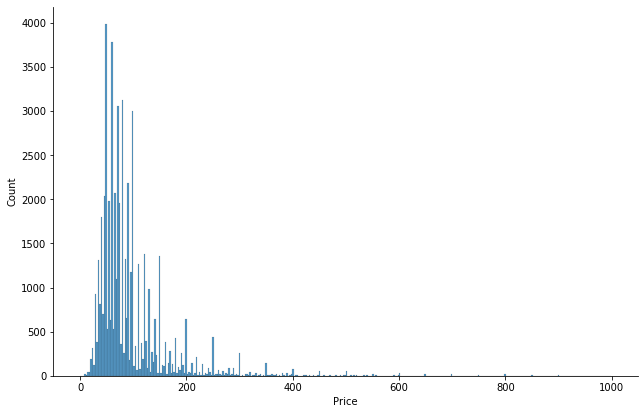

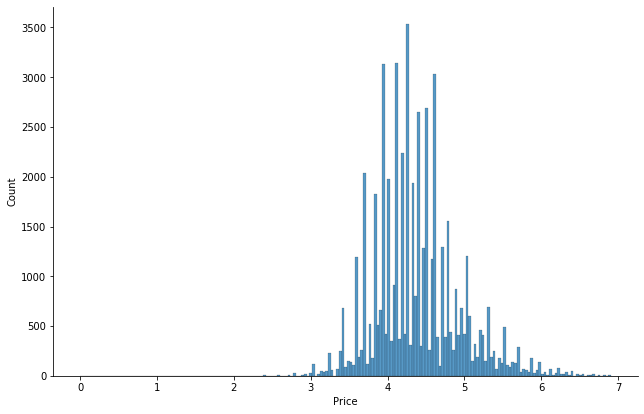

In [99]:
# Target Variation np.log1p(df["LotFrontage"])

fig = sns.displot(df_paris['Price'])
fig_log = sns.displot(np.log1p(df_paris['Price']))
fig.fig.set_size_inches(10,6)
fig_log.fig.set_size_inches(10,6)
plt.show()

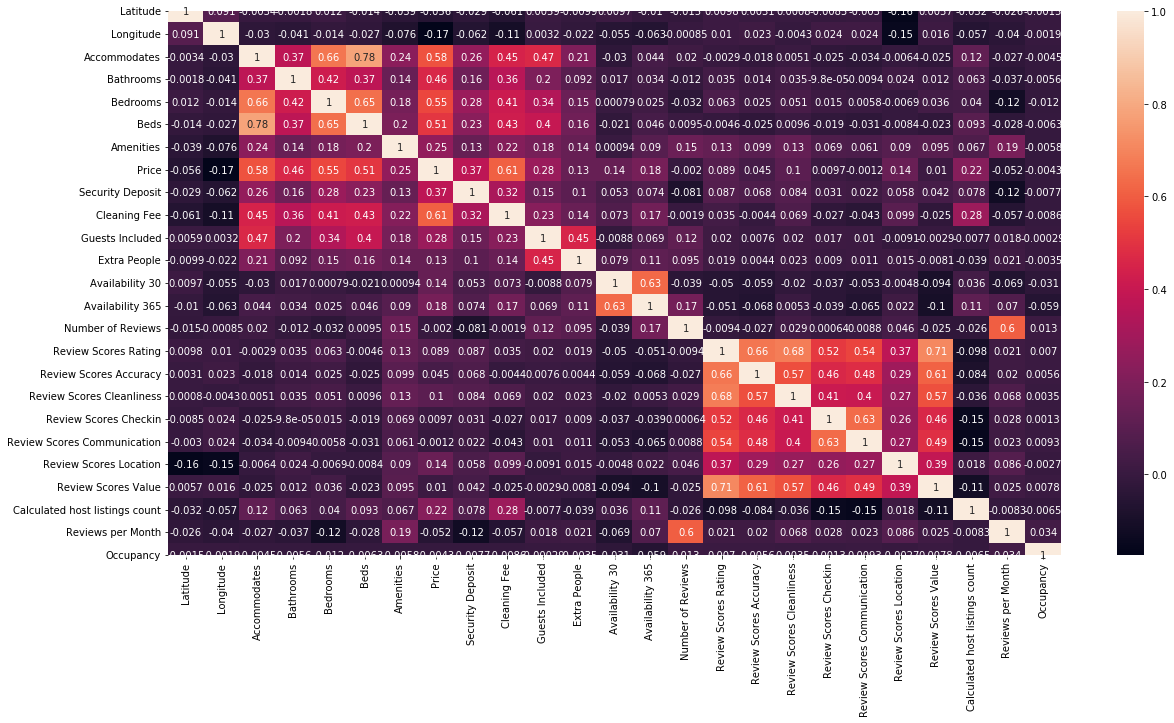

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(df_paris.corr(), annot=True)

In [ ]:
"""
import math

cate_features = [col for col in df_paris.columns if df_paris[col].dtypes == "object"]
num_features = df_paris.drop(cate_features, axis=1)

def make_subplot_layout(features, col_num) :
  k = len(features)
  row_num = math.ceil(k/col_num)
  plt.figure(figsize=(col_num*4,row_num*3))

  for i in range(k):
    plt.subplot(row_num,col_num,i+1)
    plt.hist(df_paris[features[i]])
    plt.title(features[i])
  plt.tight_layout()
  plt.show()

make_subplot_layout(cate_features, 4)
"""

'\nimport math\n\ncate_features = [col for col in df_paris.columns if df_paris[col].dtypes == "object"]\nnum_features = df_paris.drop(cate_features, axis=1)\n\ndef make_subplot_layout(features, col_num) :\n  k = len(features)\n  row_num = math.ceil(k/col_num)\n  plt.figure(figsize=(col_num*4,row_num*3))\n\n  for i in range(k):\n    plt.subplot(row_num,col_num,i+1)\n    plt.hist(df_paris[features[i]])\n    plt.title(features[i])\n  plt.tight_layout()\n  plt.show()\n\nmake_subplot_layout(cate_features, 4)\n'

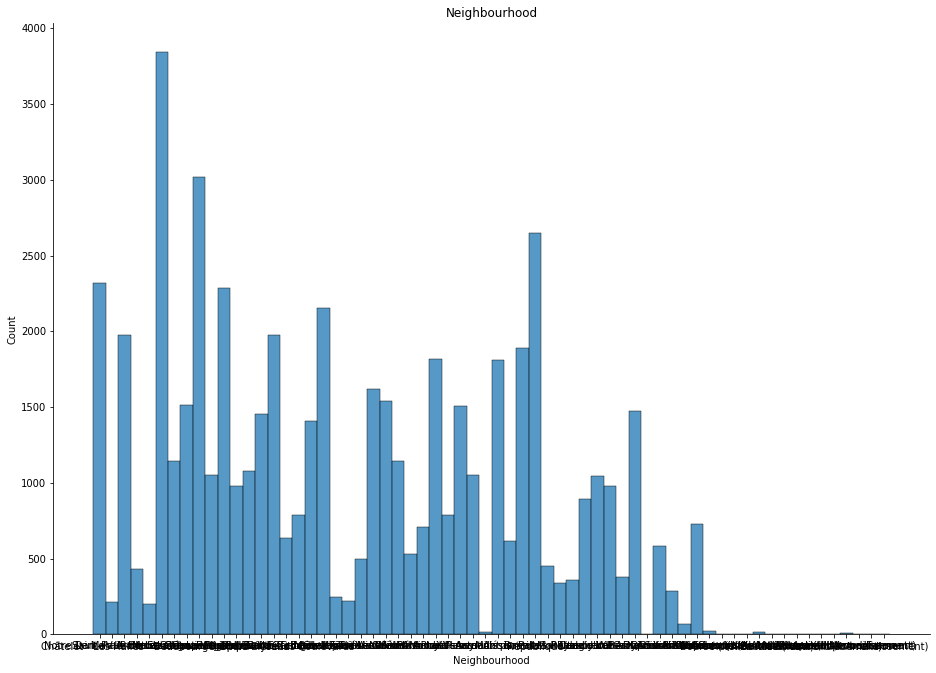

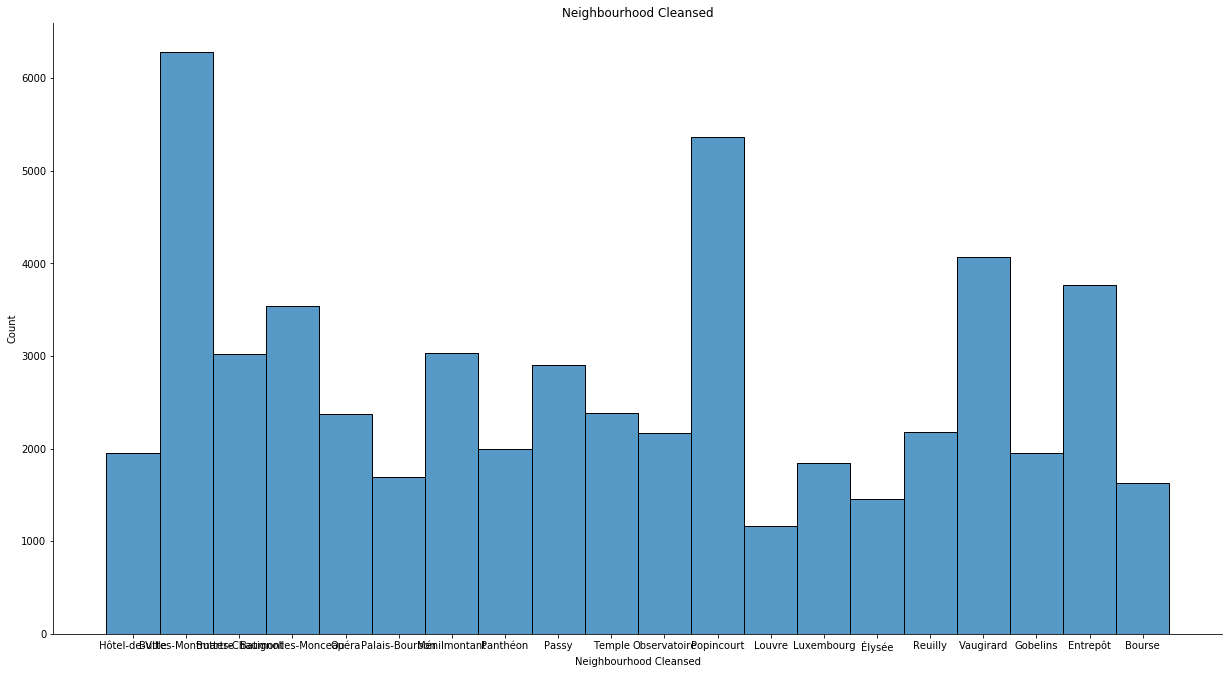

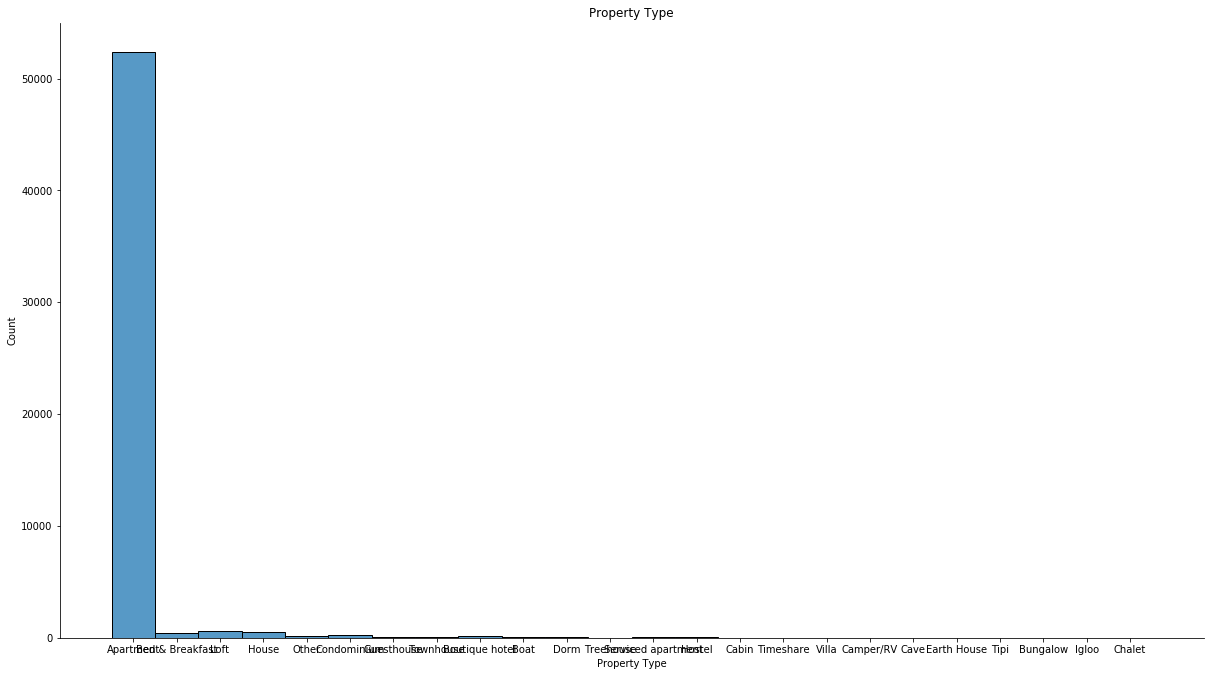

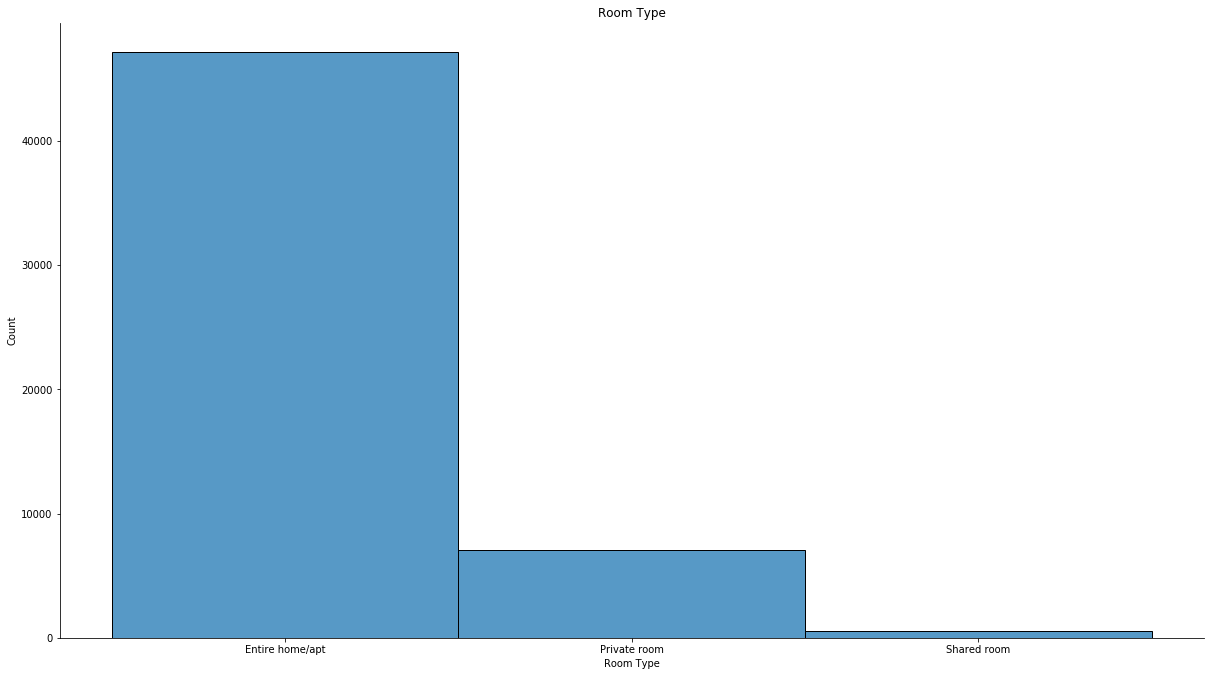

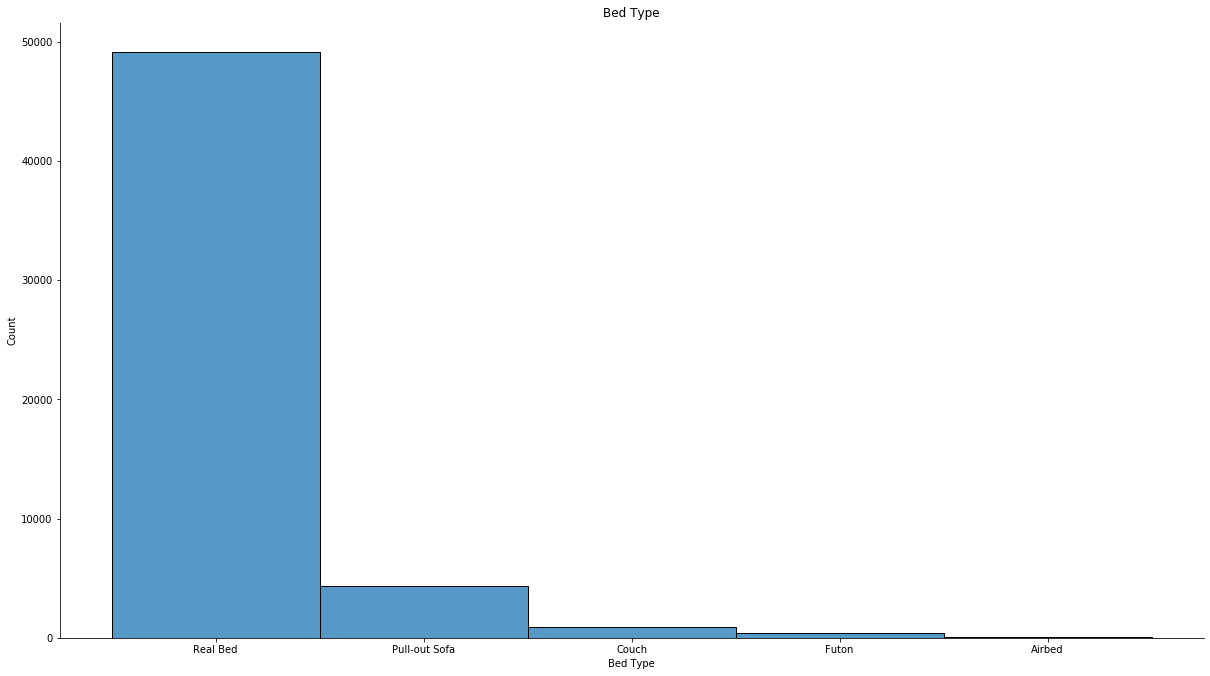

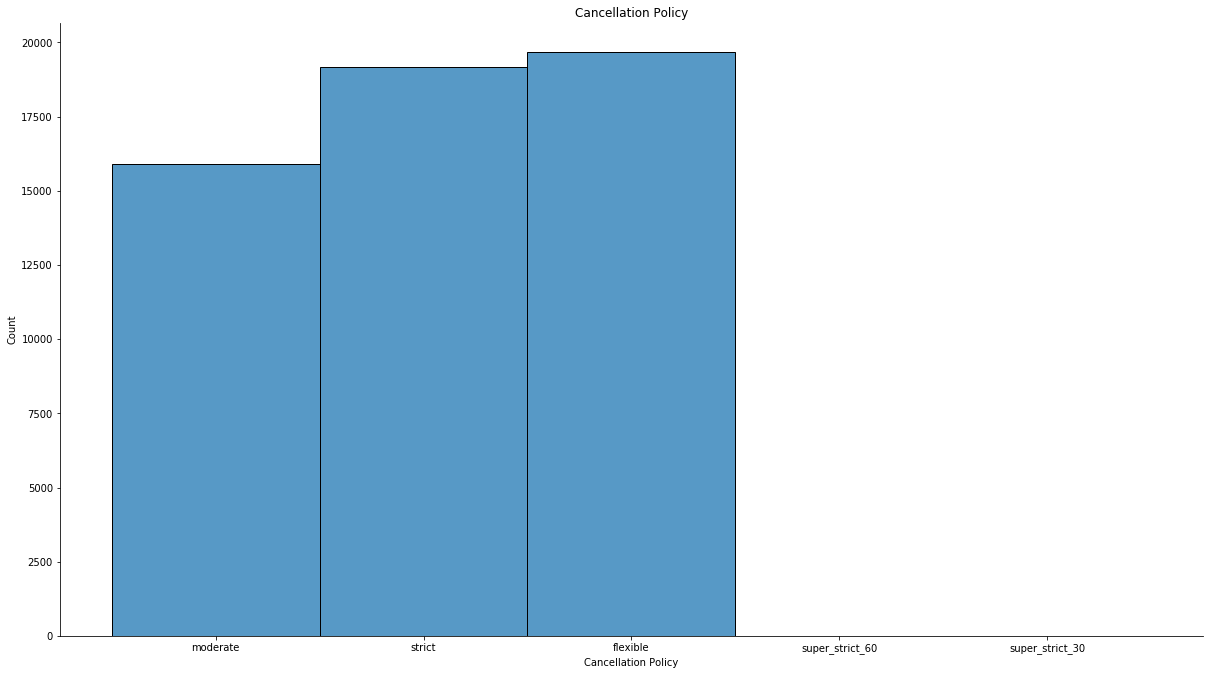

In [101]:
cate_features = [col for col in df_paris.columns if df_paris[col].dtypes == "object"]
num_features = df_paris.drop(columns = cate_features).columns


for col in cate_features:
  cate_plot = sns.displot(df_paris[col])
  cate_plot.fig.set_size_inches(20,10)
  plt.title(col)
  plt.show()

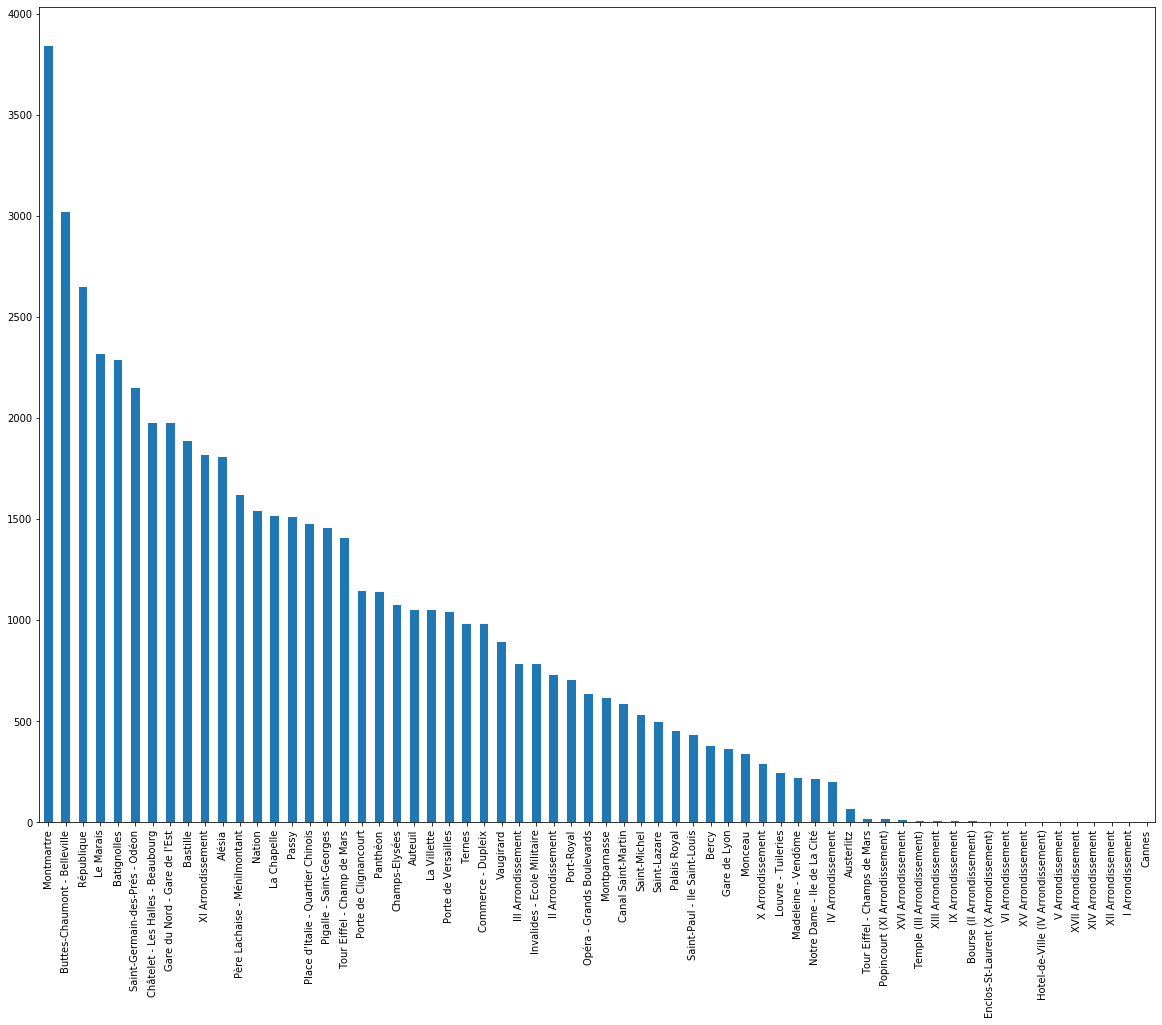

In [102]:
plt.figure(figsize=(20,15))
df_paris['Neighbourhood'].value_counts().plot(kind='bar')
plt.show()

In [103]:
del_line = df_paris['Neighbourhood'].value_counts()['IV Arrondissement']
a = df_paris['Neighbourhood'].value_counts() <= del_line
del_neighbour = a[-19:].index
del_neighbour

Index(['IV Arrondissement', 'Austerlitz', 'Tour Eiffel - Champs de Mars',
       'Popincourt (XI Arrondissement)', 'XVI Arrondissement',
       'Temple (III Arrondissement)', 'XIII Arrondissement',
       'IX Arrondissement', 'Bourse (II Arrondissement)',
       'Enclos-St-Laurent (X Arrondissement)', 'VI Arrondissement',
       'XV Arrondissement', 'Hotel-de-Ville (IV Arrondissement)',
       'V Arrondissement', 'XVII Arrondissement', 'XIV Arrondissement',
       'XII Arrondissement', 'I Arrondissement', 'Cannes'],
      dtype='object')

In [104]:
df_paris = df_paris.reset_index(drop=True)

In [105]:
for i in del_neighbour:
  drop_index = df_paris[df_paris['Neighbourhood']==i].index
  df_paris = df_paris.drop(drop_index)

df_paris['Neighbourhood'].value_counts()

Montmartre                           3842
Buttes-Chaumont - Belleville         3019
République                           2649
Le Marais                            2318
Batignolles                          2286
Saint-Germain-des-Prés - Odéon       2151
Châtelet - Les Halles - Beaubourg    1976
Gare du Nord - Gare de I'Est         1974
Bastille                             1887
XI Arrondissement                    1818
Alésia                               1809
Père Lachaise - Ménilmontant         1618
Nation                               1541
La Chapelle                          1514
Passy                                1509
Place d'Italie - Quartier Chinois    1477
Pigalle - Saint-Georges              1457
Tour Eiffel - Champ de Mars          1406
Porte de Clignancourt                1143
Panthéon                             1142
Champs-Elysées                       1077
Auteuil                              1053
La Villette                          1050
Porte de Versailles               

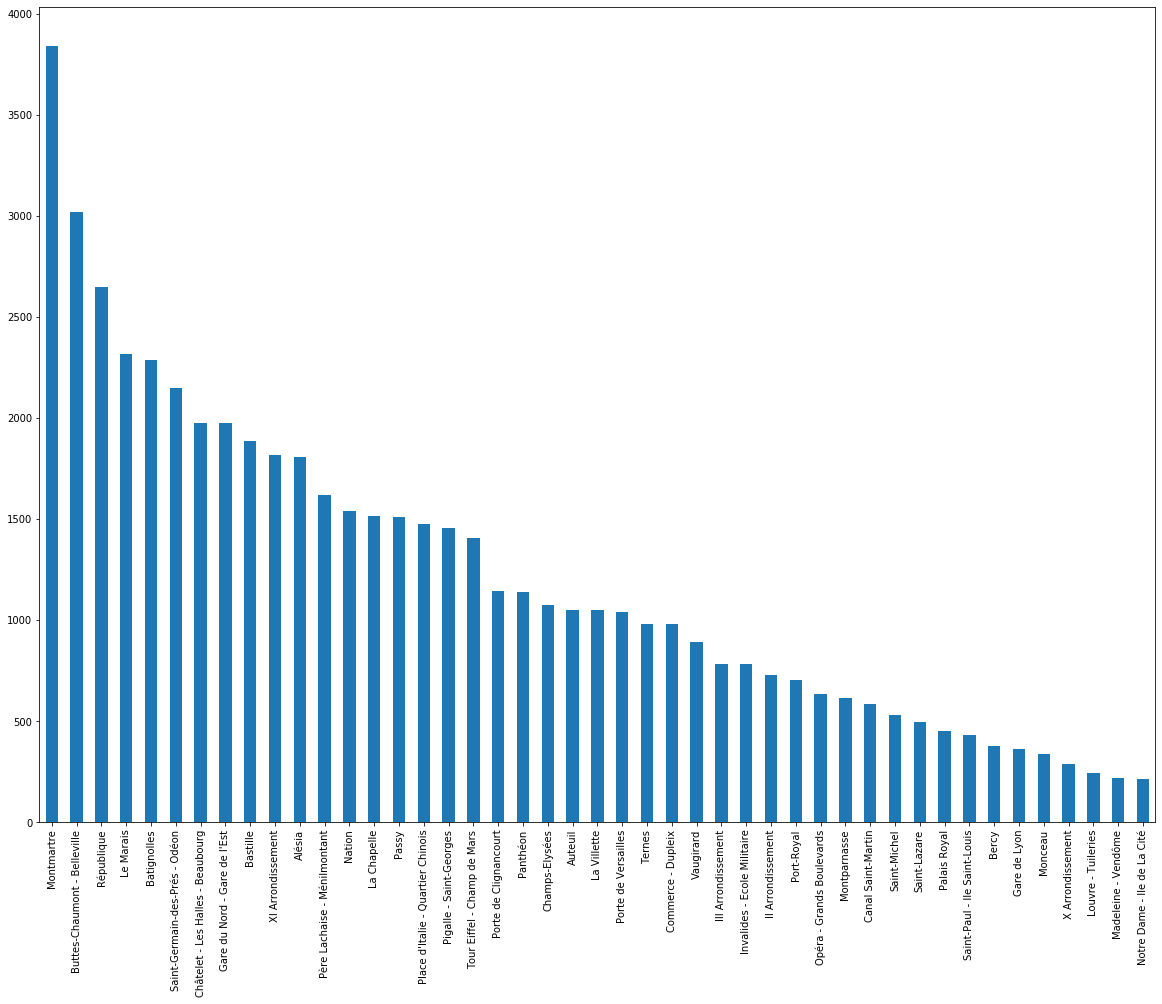

In [106]:
plt.figure(figsize=(20,15))
df_paris['Neighbourhood'].value_counts().plot(kind='bar')
plt.show()

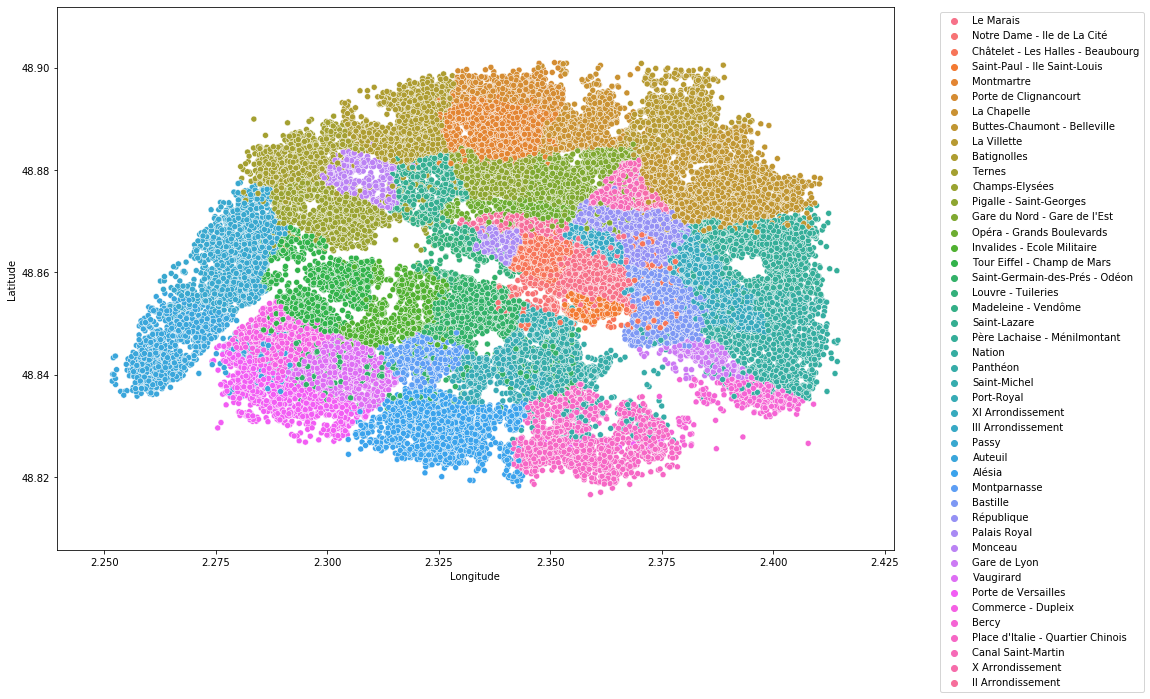

In [107]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_paris, x = 'Longitude',y = 'Latitude', hue = 'Neighbourhood')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [108]:
skewness_features = abs(df_paris.skew()).sort_values(ascending=False)

In [ ]:
"""
Q1 = df_paris['Maximum Nights'].quantile(.25)
Q3 = df_paris['Maximum Nights'].quantile(.75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

outlier_min_nights = df_paris[df_paris['Minimum Nights']>=1500].index
df_paris = df_paris.drop(outlier_min_nights)
outlier_occ = df_paris[df_paris['Occupancy']>=10].index
df_paris = df_paris.drop(outlier_occ)
outlier_max_nights = df_paris[df_paris['Maximum Nights']>=outlier_step].index
df_paris = df_paris.drop(outlier_max_nights)
outlier_extra_pep = df_paris[df_paris['Extra People']>=190].index
df_paris = df_paris.drop(outlier_extra_pep).reset_index(drop=True)
df_paris.shape
"""

In [ ]:
"""
df_paris = df_paris.drop(df_paris[df_paris['Minimum Nights']>=100].index)
df_paris = df_paris.drop(df_paris[df_paris['Occupancy']>=6].index)
df_paris.shape
"""

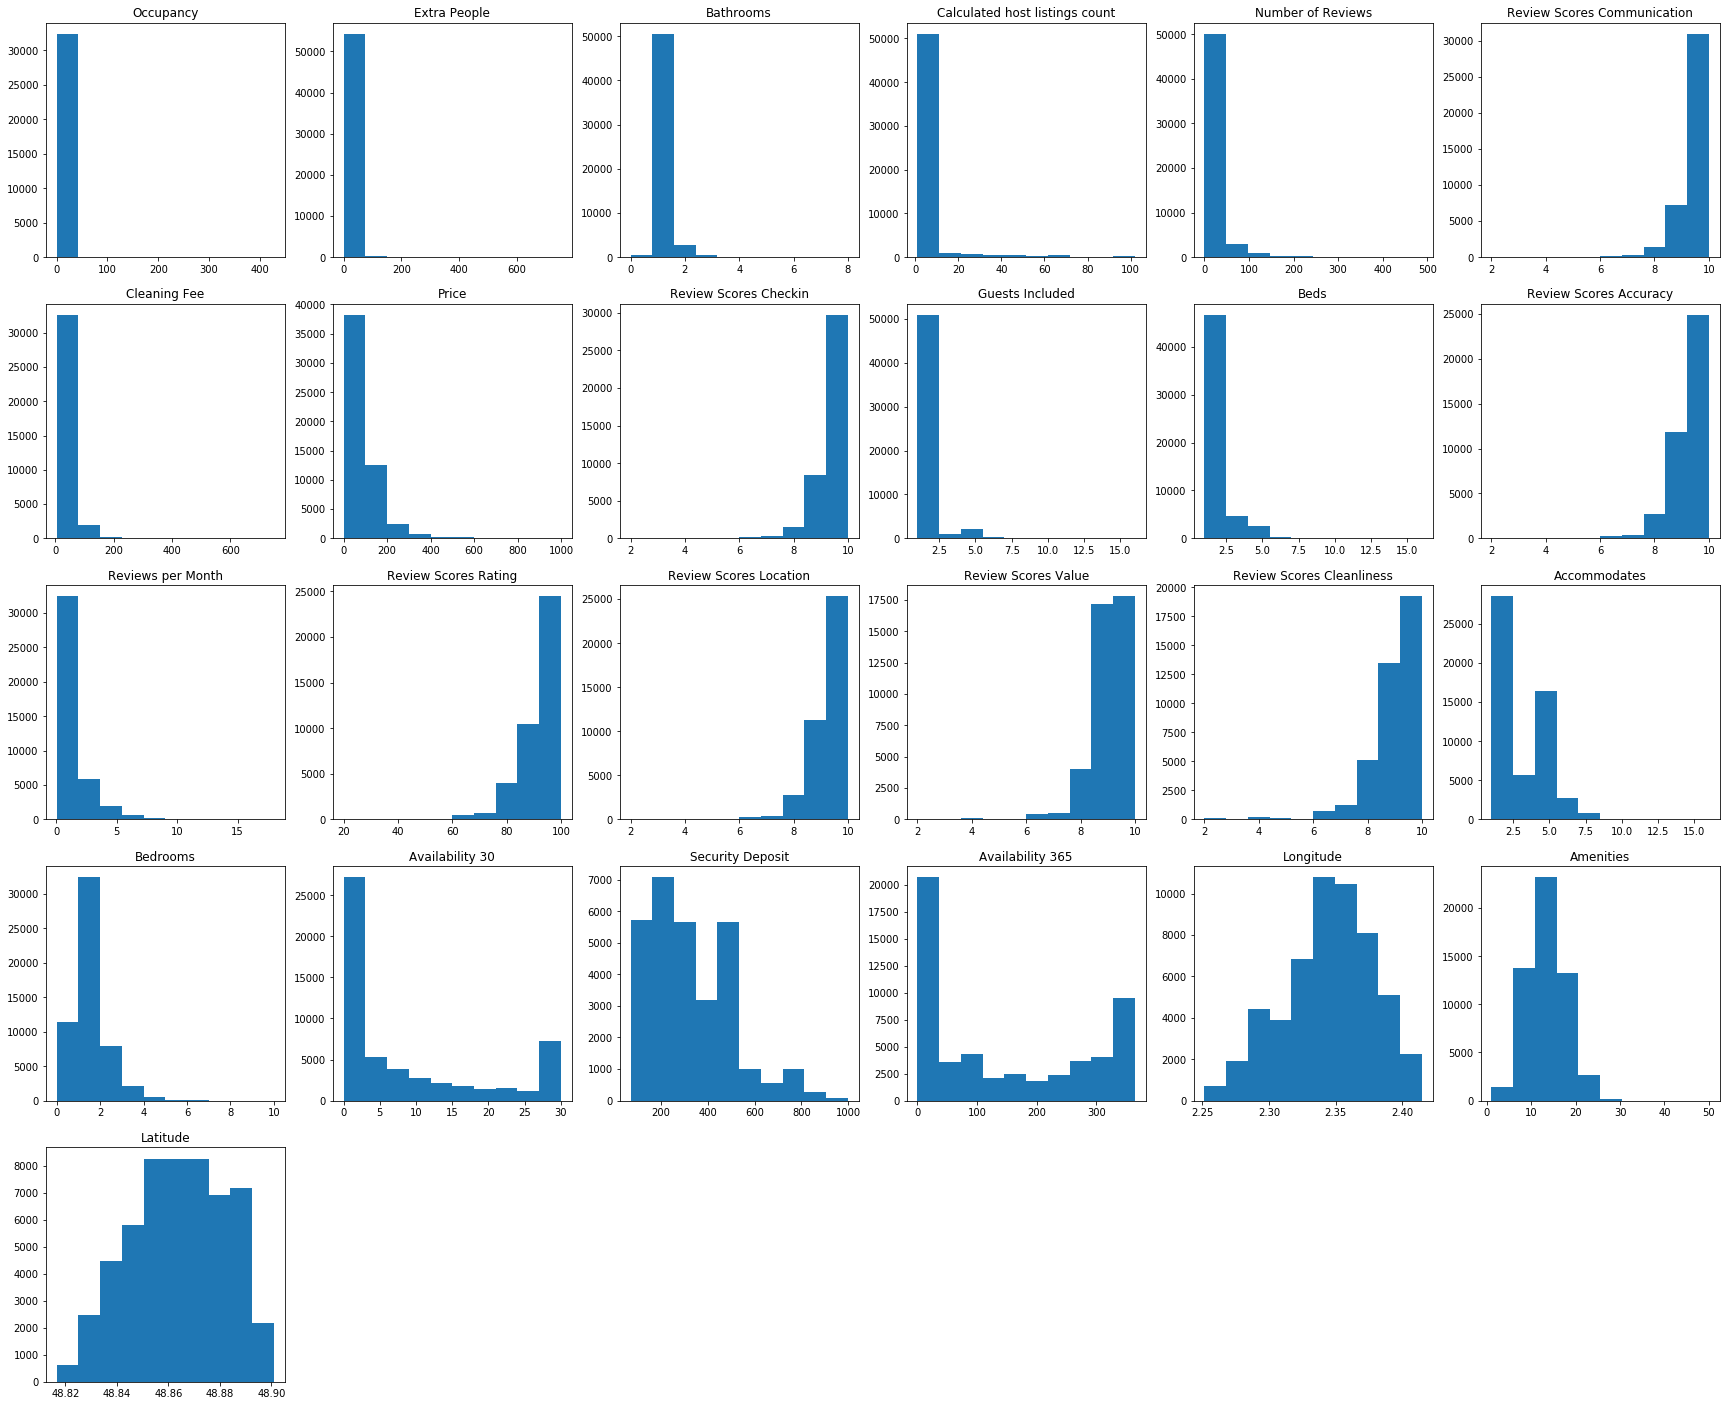

In [110]:
num = 1
plt.figure(figsize=(30,25))
for i in skewness_features.index:
  plt.subplot(5,6,num)
  plt.hist(df_paris[i])
  plt.title(i)
  num += 1
plt.show()

지역별 평균 숙소 가격

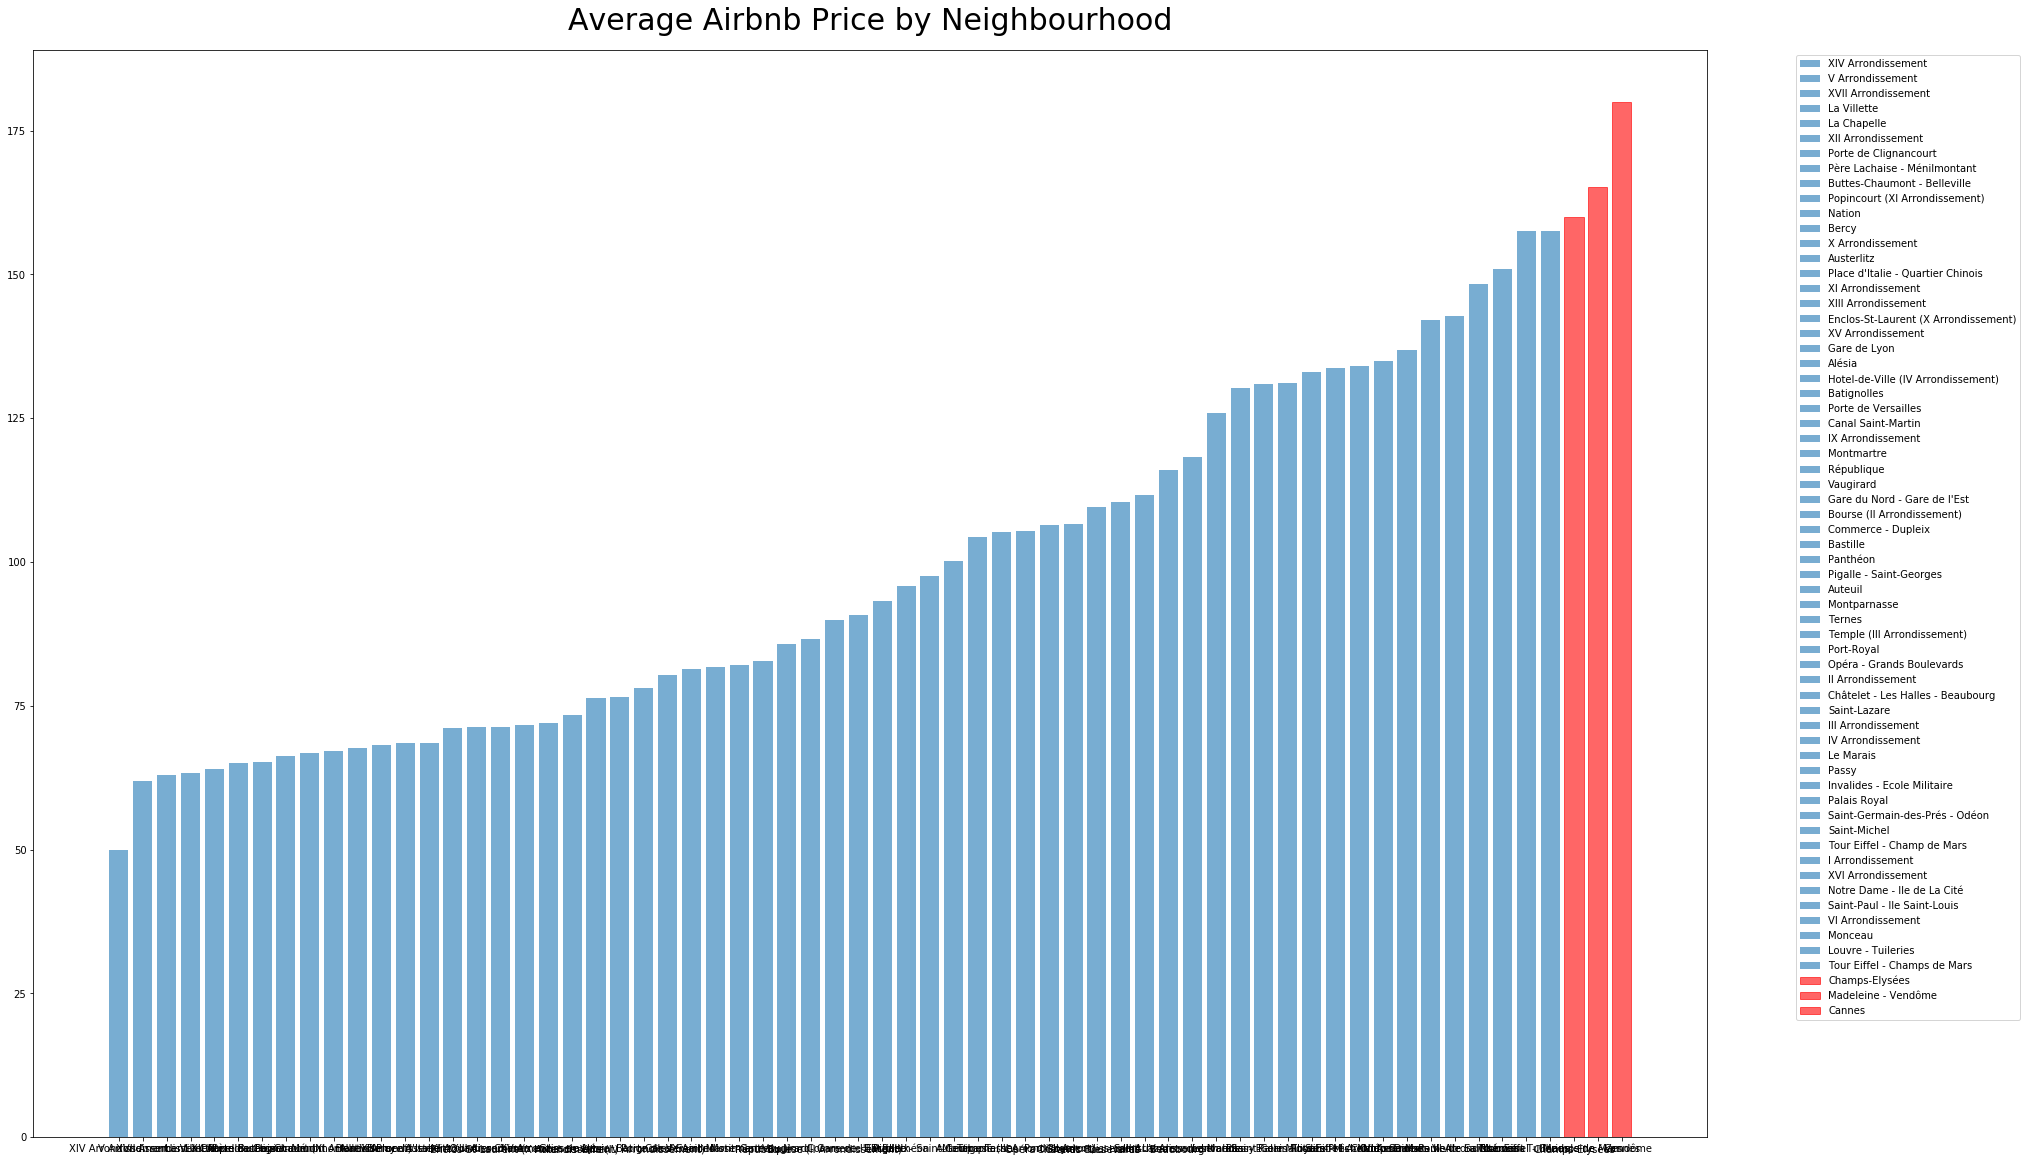

In [111]:
avg_price_per_neighbourhood = group_paris[['Neighbourhood','Price']]
avg_price_per_neighbourhood = avg_price_per_neighbourhood.sort_values('Price').reset_index(drop=True)

plt.figure(figsize=(30,20))
bars = plt.bar(avg_price_per_neighbourhood['Neighbourhood'],avg_price_per_neighbourhood['Price'], alpha = 0.6)

bars[avg_price_per_neighbourhood[['Neighbourhood']].index[-1]].set_color('r')
bars[avg_price_per_neighbourhood[['Neighbourhood']].index[-2]].set_color('r')
bars[avg_price_per_neighbourhood[['Neighbourhood']].index[-3]].set_color('r')
plt.legend(handles =bars, labels = list(avg_price_per_neighbourhood['Neighbourhood']), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Average Airbnb Price by Neighbourhood', fontsize=30, pad=20)
plt.show()

property 타입에 따른 평균 숙소 가격

In [ ]:
group_propertytype = df_paris.groupby('Property Type').mean().sort_values('Price').reset_index()
price_by_propertytype = group_propertytype[['Property Type', 'Price']]

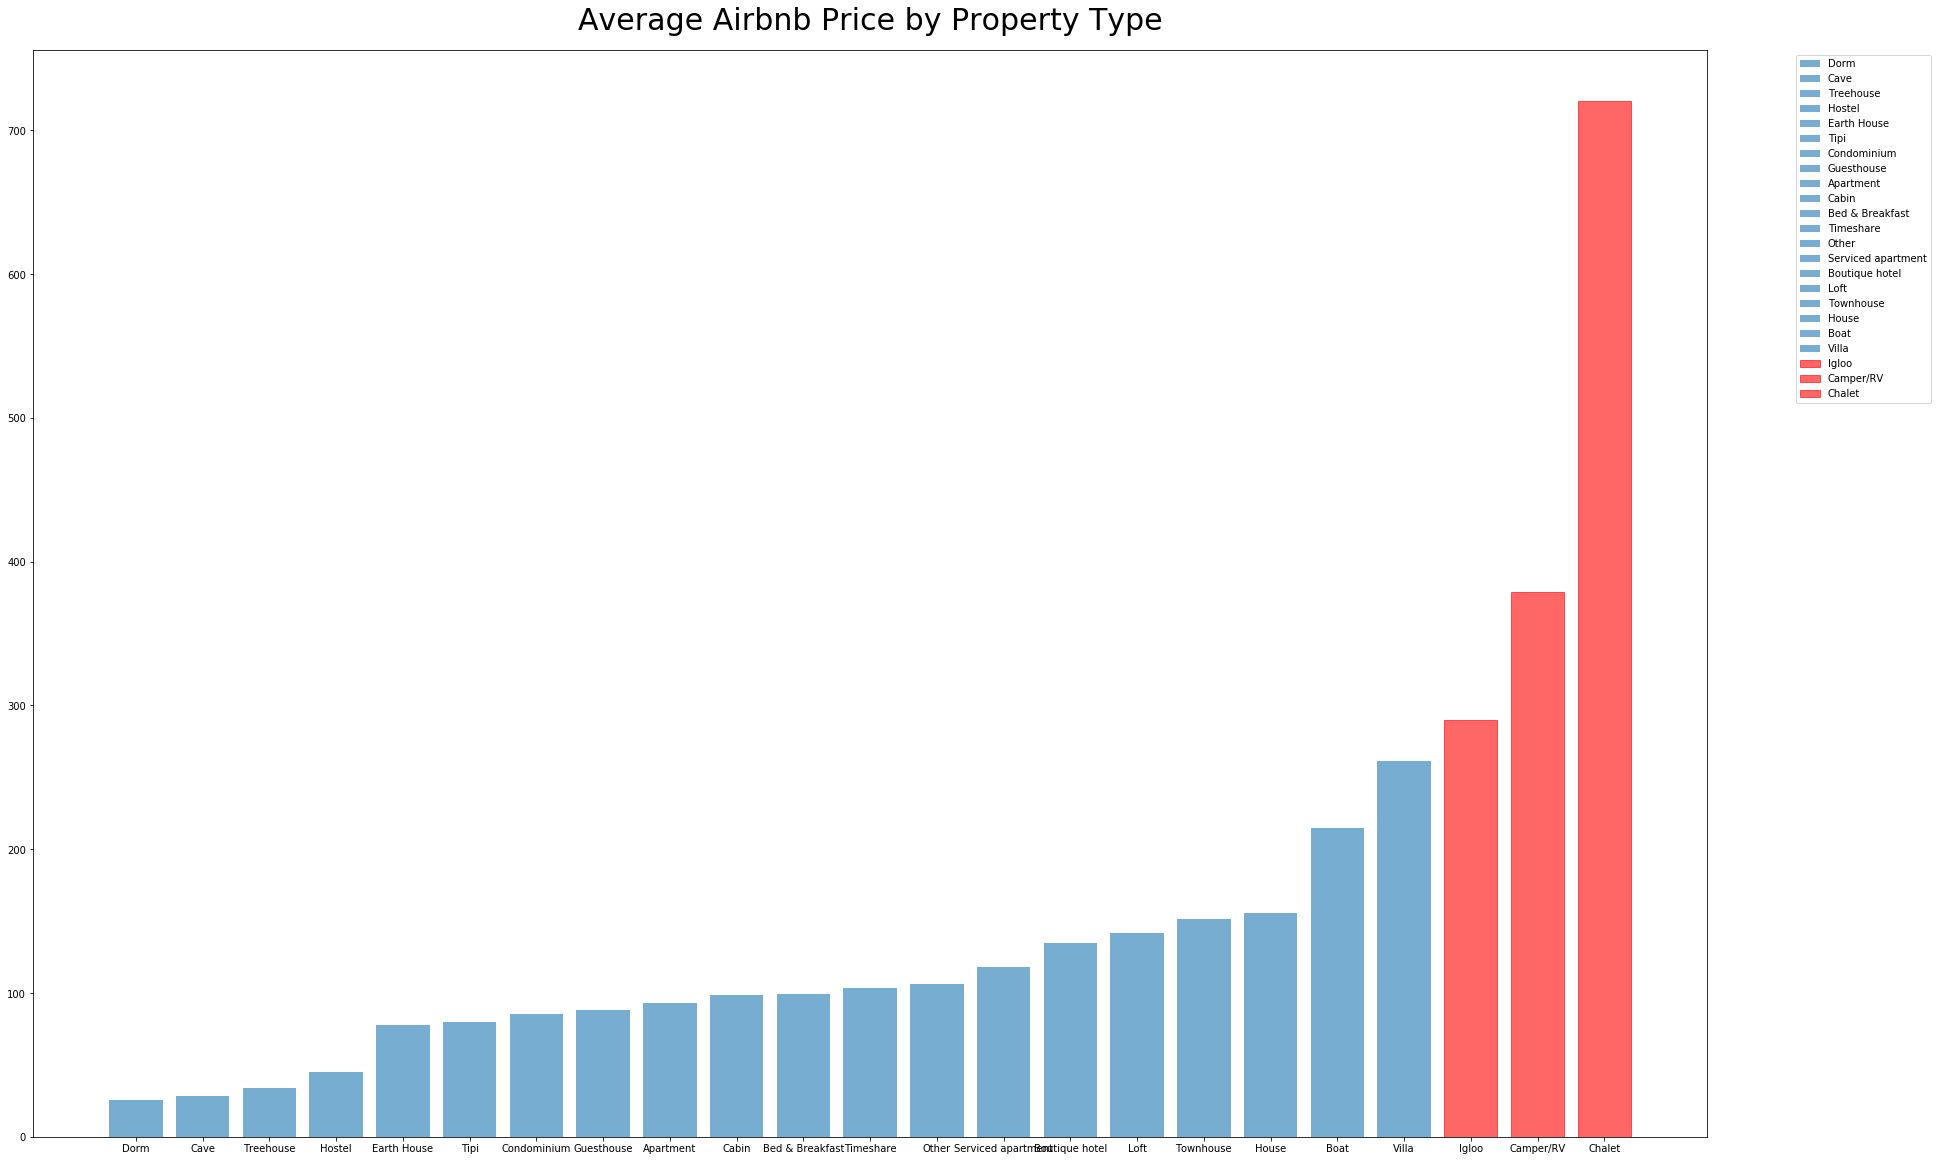

In [ ]:
plt.figure(figsize=(30,20))
bars = plt.bar(price_by_propertytype['Property Type'],price_by_propertytype['Price'], alpha = 0.6)
bars[price_by_propertytype[['Property Type']].index[-1]].set_color('r')
bars[price_by_propertytype[['Property Type']].index[-2]].set_color('r')
bars[price_by_propertytype[['Property Type']].index[-3]].set_color('r')
plt.legend(handles = bars, labels = list(price_by_propertytype['Property Type']), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Average Airbnb Price by Property Type', fontsize=30, pad=20)
plt.show()

In [ ]:
group_roomtype = df_paris.groupby('Room Type').mean().sort_values('Price').reset_index()
price_by_roomtype = group_roomtype[['Room Type', 'Price']]

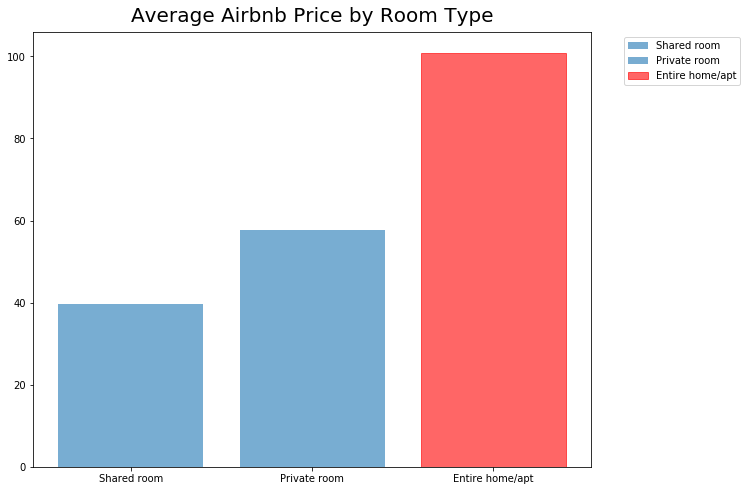

In [ ]:
plt.figure(figsize=(10,8))
bars = plt.bar(price_by_roomtype['Room Type'],price_by_roomtype['Price'], alpha = 0.6)
bars[price_by_roomtype[['Room Type']].index[-1]].set_color('r')
plt.legend(handles = bars, labels = list(price_by_roomtype['Room Type']), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Average Airbnb Price by Room Type', fontsize=20, pad=10)
plt.show()

임대료와 숙소 가격의 관계

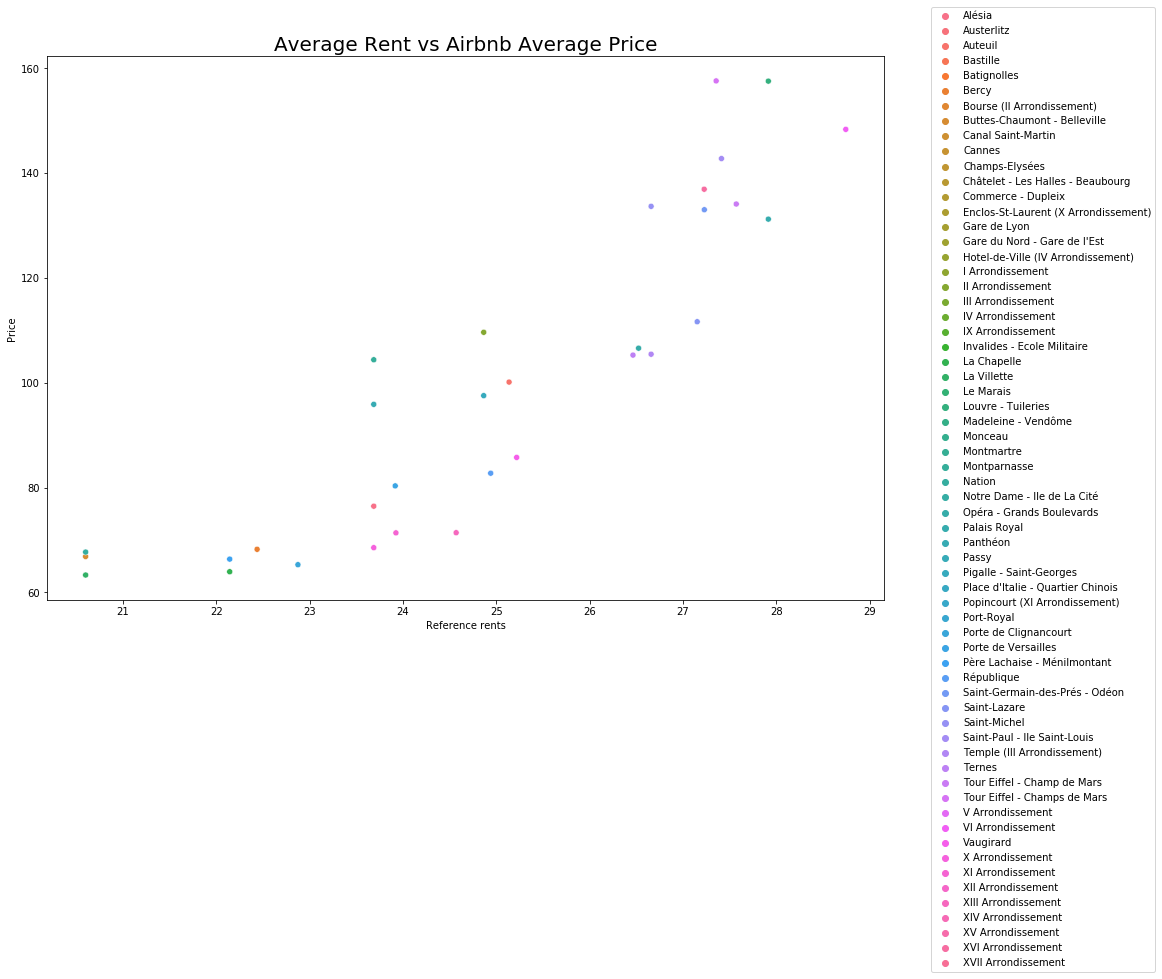

In [ ]:
accom_fee = group_paris[['Neighbourhood', 'Price']]
rel_price_rent = pd.merge(accom_fee, mean_avg_rent, how='outer', on='Neighbourhood')

plt.figure(figsize=(15,10))
sns.scatterplot(data=rel_price_rent, x = 'Reference rents',y = 'Price', hue = 'Neighbourhood')
plt.legend(bbox_to_anchor=(1.05, 1.1), loc='upper left')
plt.title('Average Rent vs Airbnb Average Price', fontsize=20)
plt.show()

지역별 숙소 개수

In [ ]:
exxx = df_paris[df_paris['Room Type']=='Entire home/apt']
private = df_paris[df_paris['Room Type']=='Private room']
shared = df_paris[df_paris['Room Type']=='Shared room']

exxx['count'] = np.NaN
private['count'] = np.NaN
shared['count'] = np.NaN

exxx['count'] = exxx['count'].fillna(1)
private['count'] = private['count'].fillna(1)
shared['count'] = shared['count'].fillna(1)



group_sum_entire_home = exxx.groupby('Neighbourhood').sum().reset_index()
group_sum_private_room = private.groupby('Neighbourhood').sum().reset_index()
group_sum_shared_room = shared.groupby('Neighbourhood').sum().reset_index()

group_sum_entire_home = group_sum_entire_home[['Neighbourhood','count']].sort_values('count')
group_sum_private_room = group_sum_private_room[['Neighbourhood','count']].sort_values('count')
group_sum_shared_room = group_sum_shared_room[['Neighbourhood','count']].sort_values('count')

a = pd.merge(group_sum_entire_home,group_sum_private_room,how='outer', on='Neighbourhood')
b = pd.merge(a, group_sum_shared_room,how='outer', on='Neighbourhood')
b = b.fillna(0)
b.columns = ['Neighbourhood', 'Entire home/apt','Private room', 'Shared room']
b = b.set_index('Neighbourhood')

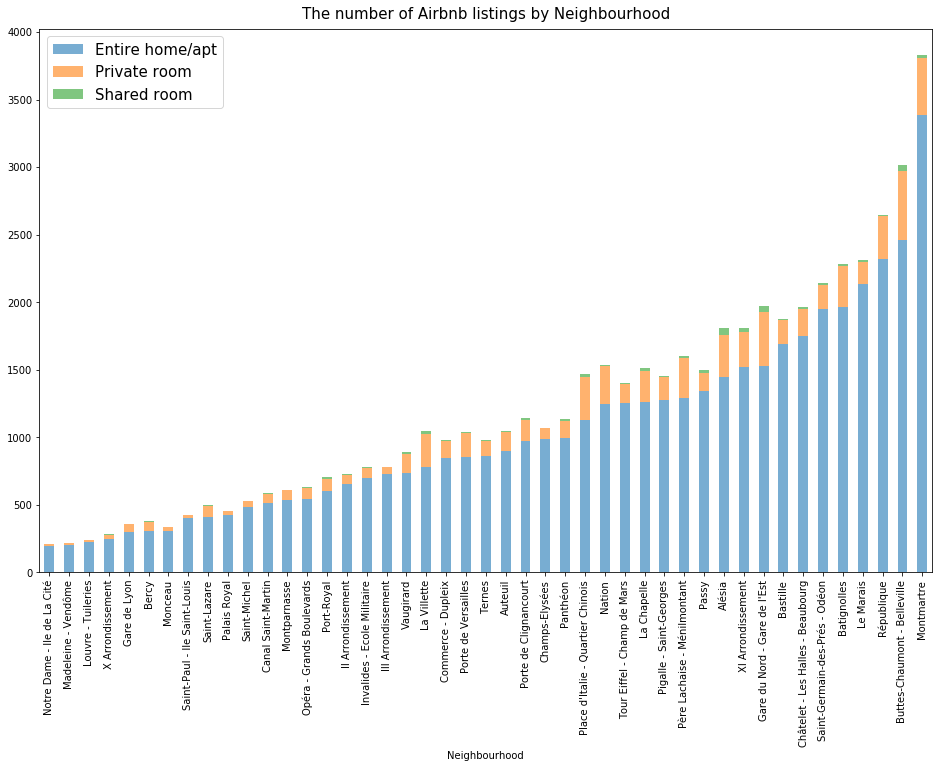

In [ ]:
b.plot.bar(stacked=True, figsize=(16,10), fontsize=10, alpha=0.6)
plt.legend(fontsize=15)
plt.title('The number of Airbnb listings by Neighbourhood', fontsize=15, pad=10)
plt.show()

 Room type에 따른 분포

In [ ]:
import random
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
loc_paris = [48.8032, 2.3511]
df_entire_room = df_paris[df_paris['Room Type']=='Entire home/apt']
df_private_room = df_paris[df_paris['Room Type']=='Private room']
df_shared_room = df_paris[df_paris['Room Type']=='Shared room']



map_paris_room_var = folium.Map(location=loc_paris, zoom_start=12, tiles='cartodbpositron')

def point_map(df, map):

  for item in df.index:
    lat = df.loc[item, 'Latitude']
    longi = df.loc[item, 'Longitude']

    folium.CircleMarker(
        [lat, longi],
        color = color
    ).add_to(map)

In [ ]:
point_map(df_entire_room, map_paris_room_var)

In [ ]:
point_map(df_private_room, map_paris_room_var)

In [ ]:
point_map(df_shared_room, map_paris_room_var)

스케일링

In [ ]:
left_skew_features = ['Review Scores Communication', 'Review Scores Checkin', 'Review Scores Accuracy', 
                      'Review Scores Rating', 'Review Scores Location', 'Review Scores Value', 'Review Scores Cleanliness']

In [ ]:
df_paris_scailing = df_paris.copy()
df_paris_num_features = [col for col in df_paris_scailing.columns if df_paris_scailing[col].dtypes != "object"]

In [112]:
def log_trans(df):
  num_features = [col for col in df.columns if df[col].dtypes != "object"]
  for i in num_features:
    df[i] = np.log1p(df[i])
  
  return df

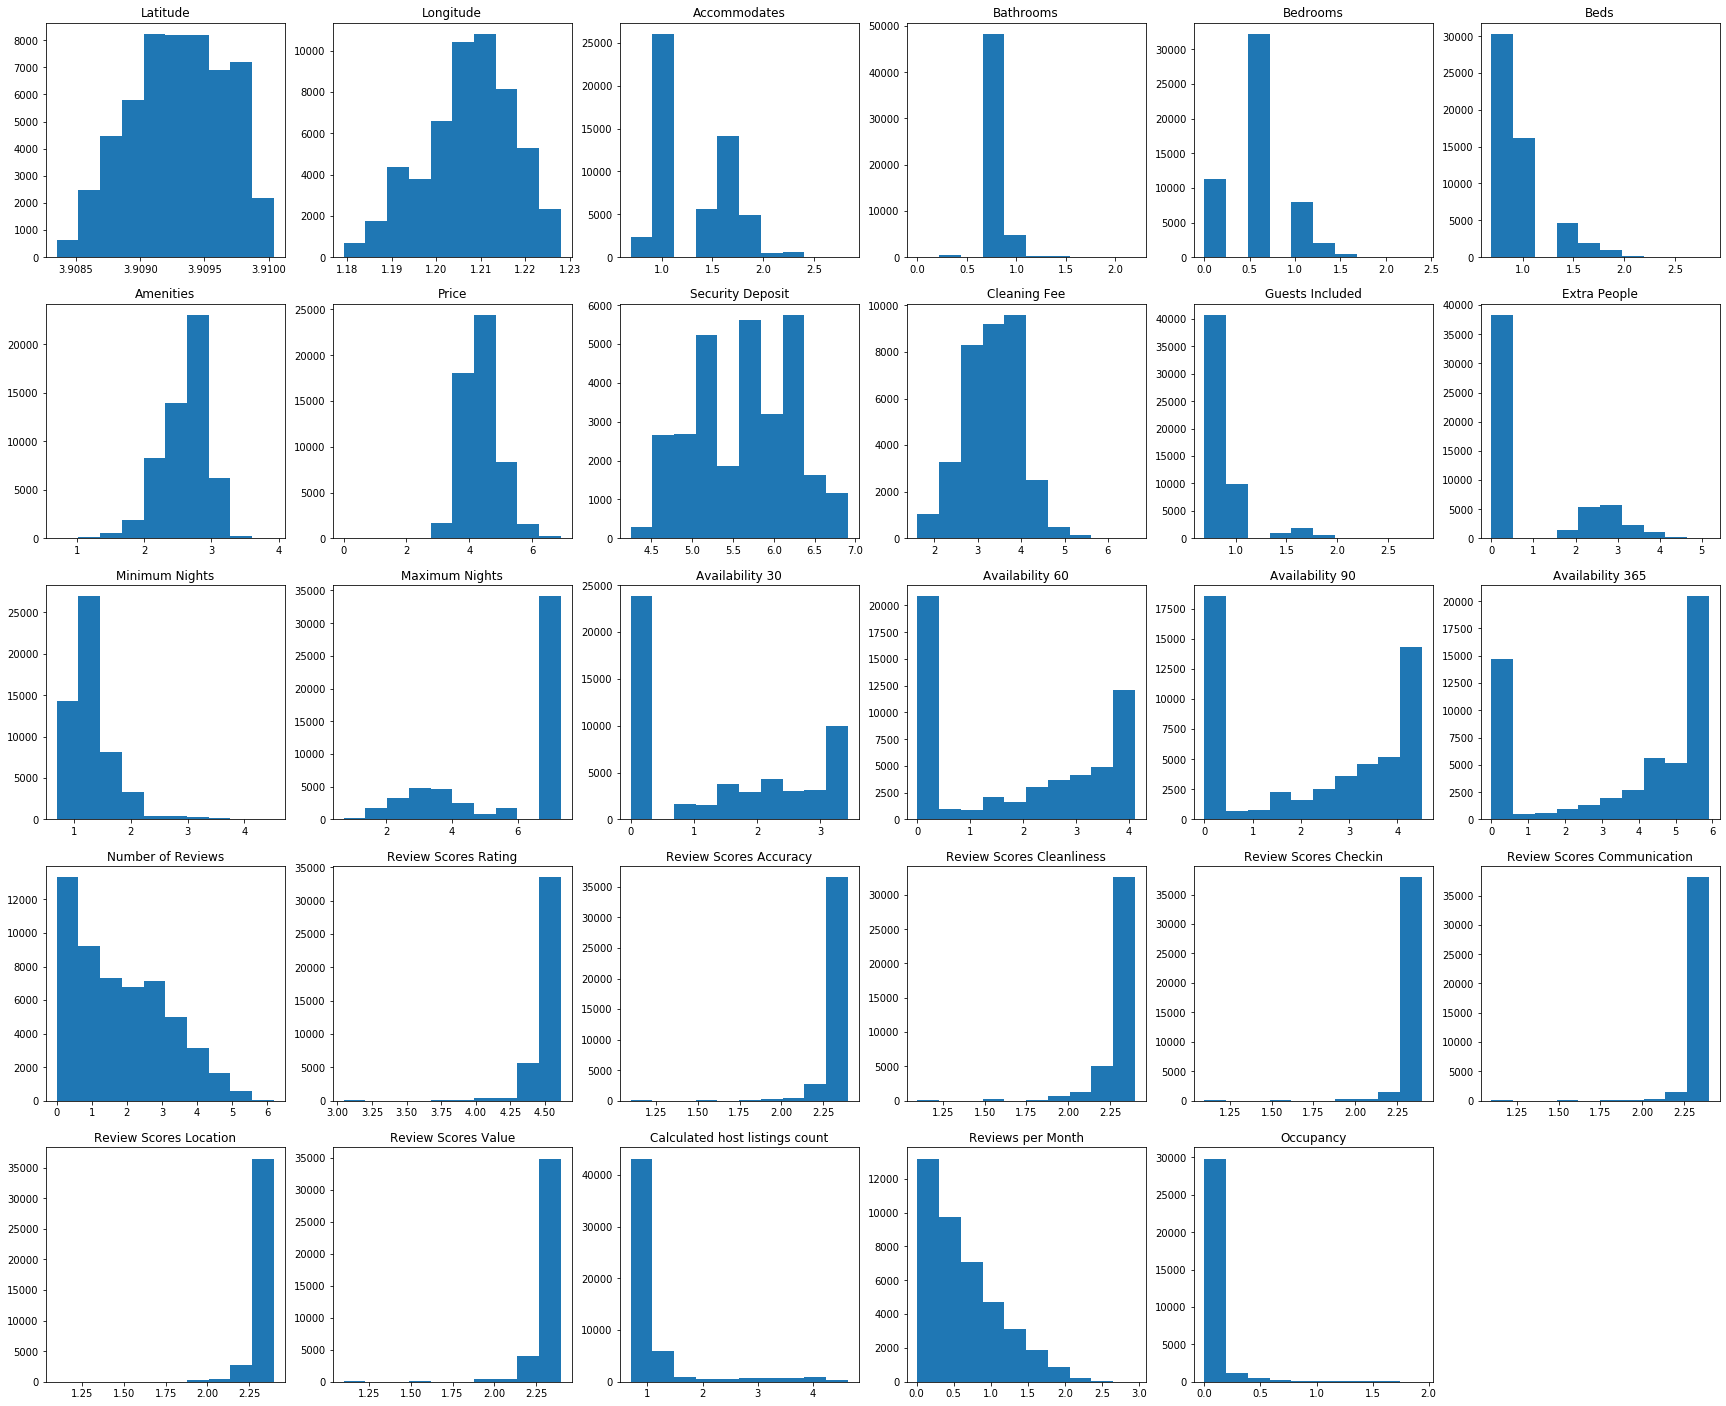

In [ ]:
num = 1
plt.figure(figsize=(30,25))
for i in df_paris_num_features:
  plt.subplot(5,6,num)
  plt.hist(df_paris_scailing[i])
  plt.title(i)
  num += 1
plt.show()

# 5. 모델링

In [113]:
import xgboost
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from category_encoders import OneHotEncoder, OrdinalEncoder

In [121]:
target = 'Price'
features = df_paris.drop(columns=target).columns

X = df_paris[features]
y = df_paris[target]

train, test = train_test_split(df_paris, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=2)

train.shape, val.shape, test.shape

((34828, 31), (8708, 31), (10885, 31))

In [122]:
train_scal, val_scal, test_scal = train.copy(), val.copy(), test.copy()
train_scal[target] = np.log1p(train_scal[target])
val_scal[target] = np.log1p(val_scal[target])
test_scal[target] = np.log1p(test_scal[target])

In [123]:
X_train_scal, X_val_scal, X_test_scal = train_scal[features], val_scal[features], test_scal[features]
y_train_scal, y_val_scal, y_test_scal = train_scal[target], val_scal[target], test_scal[target]

In [124]:
y_real = np.log1p(df_paris['Price'])
baseline = y_real.mean()
y_base = [baseline]*len(df_paris)

In [125]:
def eval_models(y_pred, y_real=y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [126]:
# 기준모델 평가지표
base_mse, base_rmse, base_mae, base_r2 = eval_models(y_base)
base_mse, base_rmse, base_mae, base_r2

(0.30922528050233217, 0.5560802824254175, 0.4277855597417826, 0.0)

In [127]:
pipe_linear = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

pipe_linear.fit(X_train_scal, y_train_scal)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighbourhood', 'Neighbourhood Cleansed',
                                     'Property Type', 'Room Type', 'Bed Type',
                                     'Cancellation Policy'])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [128]:
y_pred_train = pipe_linear.predict(X_train_scal)
y_pred_val = pipe_linear.predict(X_val_scal)

lin_mse, lin_rmse, lin_mae, lin_r2 = eval_models(y_pred_train, y_real=y_train_scal)
lin_val_mse, lin_val_rmse, lin_val_mae, lin_val_r2 = eval_models(y_pred_val, y_real=y_val_scal)

comparison_lin = pd.DataFrame(index=['Base', 'lin_train', 'lin_val'], columns=['mse','rmse', 'mae','r2'])
comparison_lin['mse'] = [base_mse, lin_mse, lin_val_mse]
comparison_lin['rmse'] = [base_rmse, lin_rmse, lin_val_rmse]
comparison_lin['mae'] = [base_mae, lin_mae, lin_val_mae]
comparison_lin['r2'] = [base_r2, lin_r2, lin_val_r2]
comparison_lin

mse      rmse       mae        r2
Base       0.309225  0.556080  0.427786  0.000000
lin_train  0.095182  0.308516  0.230745  0.690395
lin_val    0.095354  0.308795  0.231877  0.693646

In [129]:
from lightgbm.sklearn import LGBMRegressor

pipe_lgb = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LGBMRegressor(n_estimators = 500, objective = 'regression')
)
pipe_lgb.fit(X_train_scal, y_train_scal)
y_pred_train_lgb = pipe_lgb.predict(X_train_scal)
y_pred_val_lgb = pipe_lgb.predict(X_val_scal)

In [130]:
lgb_mse, lgb_rmse, lgb_mae, lgb_r2 = eval_models(y_pred_train_lgb, y_real=y_train_scal)
lgb_val_mse, lgb_val_rmse, lgb_val_mae, lgb_val_r2 = eval_models(y_pred_val_lgb, y_real=y_val_scal)

In [131]:
comparison_lgb = pd.DataFrame(index=['Base', 'lgb_train', 'lgb_val'], columns=['mse','rmse', 'mae','r2'])

comparison_lgb['mse'] = [base_mse, lgb_mse, lgb_val_mse]
comparison_lgb['rmse'] = [base_rmse, lgb_rmse, lgb_val_rmse]
comparison_lgb['mae'] = [base_mae, lgb_mae, lgb_val_mae]
comparison_lgb['r2'] = [base_r2, lgb_r2, lgb_val_r2]

comparison_lgb

mse      rmse       mae        r2
Base       0.309225  0.556080  0.427786  0.000000
lgb_train  0.049174  0.221753  0.165214  0.840047
lgb_val    0.077612  0.278590  0.209286  0.750647

In [132]:
pipe_xgb = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=6,
        n_estimators=500
    )
)

pipe_xgb.fit(X_train_scal, y_train_scal)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighbourhood', 'Neighbourhood Cleansed',
                                     'Property Type', 'Room Type', 'Bed Type',
                                     'Cancellation Policy'])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(max_depth=6, n_estimators=500,
                              objective='reg:squarederror'))])

In [133]:
y_pred_train_xgb = pipe_xgb.predict(X_train_scal)
y_pred_val_xgb = pipe_xgb.predict(X_val_scal)

In [134]:
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = eval_models(y_pred_train_xgb, y_real=y_train_scal)
xgb_val_mse, xgb_val_rmse, xgb_val_mae, xgb_val_r2 = eval_models(y_pred_val_xgb, y_real=y_val_scal)

comparison_xgb = pd.DataFrame(index=['Base', 'xgb_train', 'xgb_val'], columns=['mse','rmse', 'mae','r2'])

comparison_xgb['mse'] = [base_mse, xgb_mse, xgb_val_mse]
comparison_xgb['rmse'] = [base_rmse, xgb_rmse, xgb_val_rmse]
comparison_xgb['mae'] = [base_mae, xgb_mae, xgb_val_mae]
comparison_xgb['r2'] = [base_r2, xgb_r2, xgb_val_r2]

comparison_xgb

mse      rmse       mae        r2
Base       0.309225  0.556080  0.427786  0.000000
xgb_train  0.046771  0.216265  0.162551  0.847866
xgb_val    0.078920  0.280927  0.210622  0.746445

scailing 후

In [ ]:
features_scal = df_paris_scailing.drop(columns=target).columns

X_scal = df_paris_scailing[features_scal]
y_scal = df_paris_scailing[target]

X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y_scal, test_size=0.2)
X_train_scal, X_val_scal, y_train_scal, y_val_scal = train_test_split(X_train_scal, y_train_scal, test_size=0.2)
X_train_scal.shape, X_val_scal.shape, X_test_scal.shape

((34704, 34), (8677, 34), (10846, 34))

In [ ]:
baseline_scal = df_paris_scailing['Price'].mean()
y_real_scal = df_paris_scailing['Price']
y_base_scal = [baseline_scal]*len(df_paris_scailing)

In [ ]:
base_mse_scal, base_rmse_scal, base_mae_scal, base_r2_scal = eval_models(y_base_scal, y_real=y_real_scal)
base_mse_scal, base_rmse_scal, base_mae_scal, base_r2_scal

(0.30874987593427017, 0.5556526576326889, 0.42751658314143326, 0.0)

In [ ]:
pipe_lgb_scal = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LGBMRegressor(n_estimators = 500, objective = 'regression',random_state=2)
)

pipe_lgb_scal.fit(X_train_scal, y_train_scal)
y_pred_train_lgb_scal = pipe_lgb_scal.predict(X_train_scal)
y_pred_val_lgb_scal = pipe_lgb_scal.predict(X_val_scal)

In [ ]:
lgb_mse_scal, lgb_rmse_scal, lgb_mae_scal, lgb_r2_scal = eval_models(y_pred_train_lgb_scal, y_real=y_train_scal)
lgb_val_mse_scal, lgb_val_rmse_scal, lgb_val_mae_scal, lgb_val_r2_scal = eval_models(y_pred_val_lgb_scal, y_real=y_val_scal)

comparison_lgb_scal = pd.DataFrame(index=['Base', 'lgb_train_scal', 'lgb_val_scal'], columns=['mse','rmse', 'mae','r2'])

comparison_lgb_scal['mse'] = [base_mse, lgb_mse_scal, lgb_val_mse_scal]
comparison_lgb_scal['rmse'] = [base_rmse, lgb_rmse_scal, lgb_val_rmse_scal]
comparison_lgb_scal['mae'] = [base_mae, lgb_mae_scal, lgb_val_mae_scal]
comparison_lgb_scal['r2'] = [base_r2, lgb_r2_scal, lgb_val_r2_scal]

comparison_lgb_scal

mse       rmse        mae        r2
Base            5375.163316  73.315505  45.176883  0.000000
lgb_train_scal     0.046693   0.216087   0.161769  0.849108
lgb_val_scal       0.077073   0.277620   0.208930  0.747935

In [ ]:
pipe_xgb_scal = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=6,
        n_estimators=1000
    )
)

pipe_xgb_scal.fit(X_train_scal, y_train_scal)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighbourhood', 'Neighbourhood Cleansed',
                                     'Property Type', 'Room Type', 'Bed Type',
                                     'Cancellation Policy'])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(max_depth=6, n_estimators=1000,
                              objective='reg:squarederror'))])

In [ ]:
y_pred_train_xgb_scal = pipe_xgb_scal.predict(X_train_scal)
y_pred_val_xgb_scal = pipe_xgb_scal.predict(X_val_scal)

In [ ]:
xgb_mse_scal, xgb_rmse_scal, xgb_mae_scal, xgb_r2_scal = eval_models(y_pred_train_xgb_scal, y_real=y_train_scal)
xgb_val_mse_scal, xgb_val_rmse_scal, xgb_val_mae_scal, xgb_val_r2_scal = eval_models(y_pred_val_xgb_scal, y_real=y_val_scal)

comparison_xgb_scal = pd.DataFrame(index=['Base', 'xgb_train_scal', 'xgb_val_scal'], columns=['mse','rmse', 'mae','r2'])

comparison_xgb_scal['mse'] = [base_mse_scal, xgb_mse_scal, xgb_val_mse_scal]
comparison_xgb_scal['rmse'] = [base_rmse_scal, xgb_rmse_scal, xgb_val_rmse_scal]
comparison_xgb_scal['mae'] = [base_mae_scal, xgb_mae_scal, xgb_val_mae_scal]
comparison_xgb_scal['r2'] = [base_r2_scal, xgb_r2_scal, xgb_val_r2_scal]

comparison_xgb_scal

mse      rmse       mae        r2
Base            0.308750  0.555653  0.427517  0.000000
xgb_train_scal  0.029768  0.172535  0.127763  0.903802
xgb_val_scal    0.078042  0.279359  0.210290  0.744767

In [135]:
from scipy.stats.distributions import uniform
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn

In [136]:
params = {
    "simpleimputer__strategy": hp.choice("strategy", ["median", "mean"]),
    "lgbmregressor__max_depth": hp.quniform("max_depth", 2, 10, 2),
    "lgbmregressor__min_child_weight": hp.quniform("min_child_weight", 2, 10, 2),
    "lgbmregressor__colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
    'lgbmregressor__subsample':        hp.uniform('subsample', 0.6, 1),
    'lgbmregressor__num_leaves':       hp.choice('num_leaves', np.arange(1, 200, 1, dtype=int)),
    'lgbmregressor__min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'lgbmregressor__reg_alpha':        hp.uniform('reg_alpha',0,1),
    'lgbmregressor__reg_lambda':       hp.uniform('reg_lambda',0,1)
}

In [137]:
def get_pipe(params):
    params["lgbmregressor__max_depth"] = int(
        params["lgbmregressor__max_depth"]
    )  
    pipe = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(strategy='median'),
        StandardScaler(),
        LGBMRegressor(
            n_estimators = 100, 
            objective = 'regression',
            random_state=2,
            n_jobs=-1,
            )
    )
    pipe = pipe.set_params(**params)
    return pipe

def fit_and_eval(params):

    pipe = get_pipe(params)  
    score = cross_val_score(pipe, X_train_scal, y_train_scal, cv=3, scoring="r2")
    avg_cv_score = np.mean(score)
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=50
)

100%|██████████| 50/50 [06:04<00:00,  7.29s/it, best loss: -0.740933401563952]


In [138]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 r2: ", -trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'colsample_bytree': [0.5999889230330548], 'max_depth': [10.0], 'min_child_weight': [4.0], 'min_split_gain': [0.003658176527194773], 'num_leaves': [99], 'reg_alpha': [0.6292811244144625], 'reg_lambda': [0.5626907735408876], 'strategy': [0], 'subsample': [0.7897309175897574]}
최적 r2:  0.740933401563952


In [152]:
best_lgbm_model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LGBMRegressor(
    n_estimators = 1000, 
    objective = 'regression',
    random_state=2,
    n_jobs=-1,
    colsample_bytree=0.6,
    max_depth = 2,
    min_child_weight=4,
    min_split_gain=0.004,
    num_leaves=99,
    reg_alpha=0.63,
    reg_lambda=0.56,
    subsample=0.79)
)
    
best_lgbm_model.fit(X_train_scal, y_train_scal)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighbourhood', 'Neighbourhood Cleansed',
                                     'Property Type', 'Room Type', 'Bed Type',
                                     'Cancellation Policy'])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(colsample_bytree=0.6, max_depth=2,
                               min_child_weight=4, min_split_gain=0.004,
                               n_estimators=1000, num_leaves=99,
                               objective='regression', random_state=2,
                               reg_alpha=0.63, reg_lambda=0.56,
                               subsample=0.79))])

In [153]:
y_pred_train_best = best_lgbm_model.predict(X_train_scal)
y_pred_val_best = best_lgbm_model.predict(X_val_scal)

In [154]:
best_mse, best_rmse, best_mae, best_r2 = eval_models(y_pred_train_best, y_real=y_train_scal)
best_val_mse, best_val_rmse, best_val_mae, best_val_r2 = eval_models(y_pred_val_best, y_real=y_val_scal)

comparison_best = pd.DataFrame(index=['Base', 'best_train', 'best_val_scal'], columns=['mse','rmse', 'mae','r2'])

comparison_best['mse'] = [base_mse, best_mse, best_val_mse]
comparison_best['rmse'] = [base_rmse, best_rmse, best_val_rmse]
comparison_best['mae'] = [base_mae, best_mae, best_val_mae]
comparison_best['r2'] = [base_r2, best_r2, best_val_r2]

comparison_best

mse      rmse       mae        r2
Base           0.309225  0.556080  0.427786  0.000000
best_train     0.075687  0.275112  0.205921  0.753809
best_val_scal  0.080316  0.283401  0.212375  0.741960

# 해석

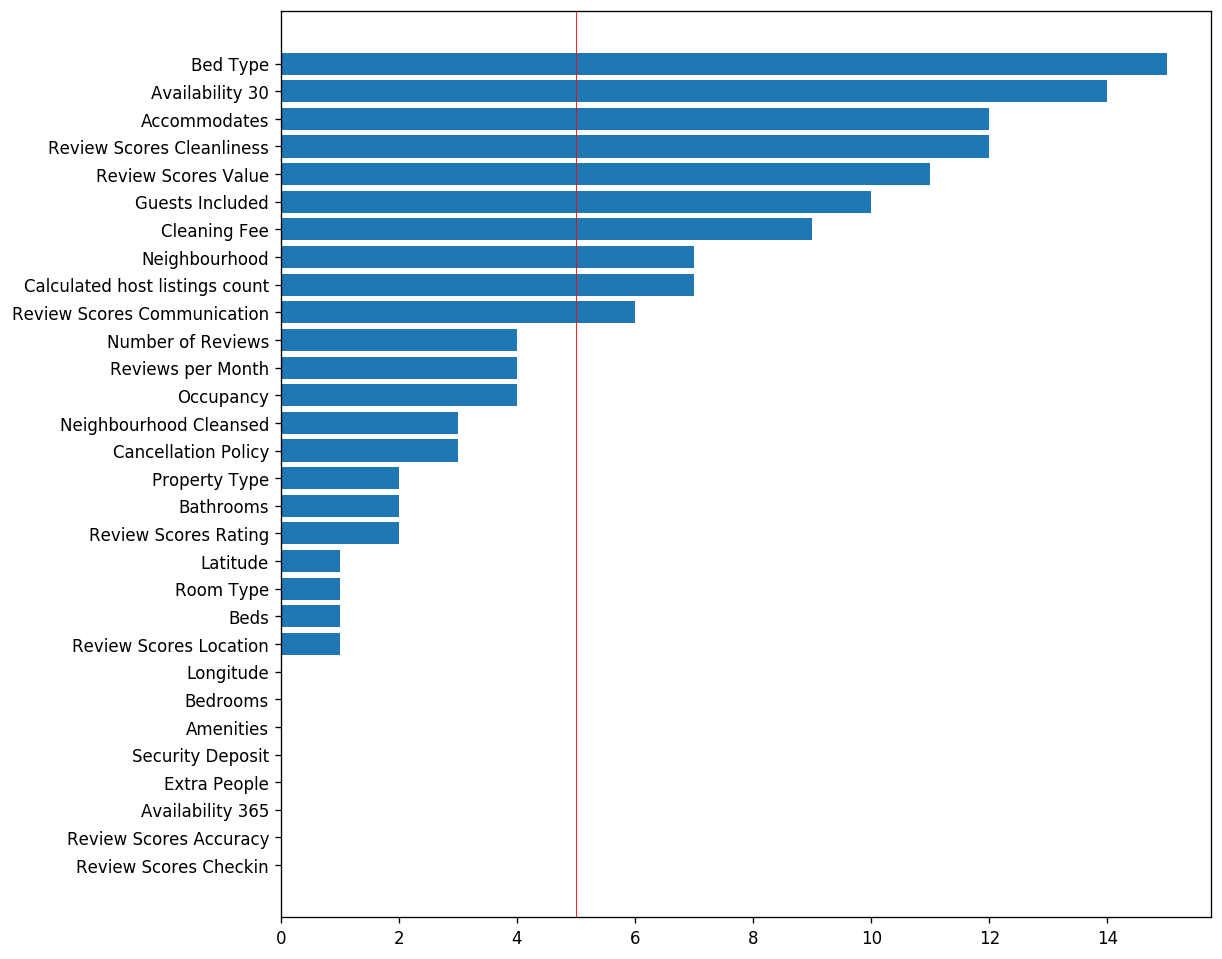

In [155]:
# 특성 중요도

feature_importances = list(
    zip(X_train_scal.columns, best_lgbm_model.named_steps["lgbmregressor"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(5, color="red", linewidth=0.5)

In [156]:
features_selected = list(filter(lambda x: x[1] >= 5, feature_importances))
print(features_selected)
selected_feature_names = list(map(lambda x: x[0], features_selected))

[('Bed Type', 15), ('Availability 30', 14), ('Accommodates', 12), ('Review Scores Cleanliness', 12), ('Review Scores Value', 11), ('Guests Included', 10), ('Cleaning Fee', 9), ('Neighbourhood', 7), ('Calculated host listings count', 7), ('Review Scores Communication', 6)]


In [157]:
X_train_selected = X_train_scal[selected_feature_names]
X_val_selected = X_val_scal[selected_feature_names]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LGBMRegressor(
    n_estimators = 1000, 
    objective = 'regression',
    random_state=2,
    n_jobs=-1,
    colsample_bytree=0.6,
    max_depth = 2,
    min_child_weight=4,
    min_split_gain=0.004,
    num_leaves=99,
    reg_alpha=0.63,
    reg_lambda=0.56,
    subsample=0.79)
)

pipe.fit(X_train_selected, y_train_scal)
y_pred_train_sel = pipe.predict(X_train_selected)
y_pred_val_sel = pipe.predict(X_val_selected)

sel_mse, sel_rmse, sel_mae, sel_r2 = eval_models(y_pred_train_sel, y_real=y_train_scal)
sel_val_mse, sel_val_rmse, sel_val_mae, sel_val_r2 = eval_models(y_pred_val_sel, y_real=y_val_scal)

print("훈련MSE:",sel_mse, "훈련RMSE:",sel_rmse,"훈련MAE:",sel_mae, '훈련R2:',sel_r2)
print("검증MSE:",sel_val_mse, "검증RMSE:",sel_val_rmse,"검증MAE:",sel_val_mae, '검증R2:',sel_val_r2)
print("훈련 r2: ", pipe.score(X_train_selected, y_train_scal))
print("검증 r2: ", pipe.score(X_val_selected, y_val_scal))
print("특성 수:")
print("\tBefore: ", X_train_scal.shape[1])
print("\tAfter: ", X_train_selected.shape[1])

훈련MSE: 0.10948268778607877 훈련RMSE: 0.3308816824577613 훈련MAE: 0.2499346744745279 훈련R2: 0.6438784292966502
검증MSE: 0.11335217868067742 검증RMSE: 0.3366781529601786 검증MAE: 0.2546614367805125 검증R2: 0.6358220393217702
훈련 r2:  0.6438784292966502
검증 r2:  0.6358220393217702
특성 수:
	Before:  30
	After:  10


# test

In [ ]:
"""
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

reg_candidate = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 100]

params = {
    'simpleimputer__strategy':hp.choice('strategy', ['median', 'mean']),
    'xgbregressor__max_depth':hp.quniform('max_depth', 2, 12, 2),
    'xgbregressor__learning_rate':hp.quniform('learning_rate', 0.01, 0.05, 0.005),
    'xgbregressor__n_estimators': hp.quniform('n_estimators', 200, 1500, 100),
    'xgbregressor__min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
}
"""

"\nfrom hyperopt import hp, fmin, tpe, Trials, STATUS_OK\n\nreg_candidate = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 100]\n\nparams = {\n    'simpleimputer__strategy':hp.choice('strategy', ['median', 'mean']),\n    'xgbregressor__max_depth':hp.quniform('max_depth', 2, 12, 2),\n    'xgbregressor__learning_rate':hp.quniform('learning_rate', 0.01, 0.05, 0.005),\n    'xgbregressor__n_estimators': hp.quniform('n_estimators', 200, 1500, 100),\n    'xgbregressor__min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),\n}\n"

In [ ]:
"""
def get_pipe(params):
    params["xgbregressor__max_depth"] = int(
        params["xgbregressor__max_depth"]
    )
    pipe = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(strategy="median"),
        StandardScaler(),
        XGBRegressor(
            objective="reg:squarederror",
            eval_metric="r2",
            n_estimators=500,
            n_jobs=-1,
            learning_rate=0.1,
            use_label_encoder=False,
        ),
    )
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):

  pipe = get_pipe(params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
  score = cross_val_score(pipe, X_train_scal, y_train_scal, cv=5, scoring="r2")
  avg_cv_score = np.mean(score)

  return {"loss": -avg_cv_score, "status": STATUS_OK}

trials = (
    Trials()
)

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=10
)
"""

'\ndef get_pipe(params):\n    params["xgbregressor__max_depth"] = int(\n        params["xgbregressor__max_depth"]\n    )\n    pipe = make_pipeline(\n        OneHotEncoder(),\n        SimpleImputer(strategy="median"),\n        StandardScaler(),\n        XGBRegressor(\n            objective="reg:squarederror",\n            eval_metric="r2",\n            n_estimators=500,\n            n_jobs=-1,\n            learning_rate=0.1,\n            use_label_encoder=False,\n        ),\n    )\n    pipe = pipe.set_params(**params)\n    return pipe\n\n\ndef fit_and_eval(params):\n\n  pipe = get_pipe(params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.\n  score = cross_val_score(pipe, X_train_scal, y_train_scal, cv=5, scoring="r2")\n  avg_cv_score = np.mean(score)\n\n  return {"loss": -avg_cv_score, "status": STATUS_OK}\n\ntrials = (\n    Trials()\n)\n\nbest_params = fmin(\n    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=10\n)\n'

# 6. 해석

In [158]:
X_total = pd.concat([X_train_scal, X_val_scal])
y_total = pd.concat([y_train_scal, y_val_scal])
best_lgbm_model.fit(X_total, y_total)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighbourhood', 'Neighbourhood Cleansed',
                                     'Property Type', 'Room Type', 'Bed Type',
                                     'Cancellation Policy'])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(colsample_bytree=0.6, max_depth=2,
                               min_child_weight=4, min_split_gain=0.004,
                               n_estimators=1000, num_leaves=99,
                               objective='regression', random_state=2,
                               reg_alpha=0.63, reg_lambda=0.56,
                               subsample=0.79))])

In [159]:
y_pred = best_lgbm_model.predict(X_test_scal)
fin_mse, fin_rmse, fin_mae, fin_r2 = eval_models(y_pred, y_real=y_test_scal)
print("MSE:",fin_mse, "RMSE:",fin_rmse,"MAE:",fin_mae, 'R2:',fin_r2)

MSE: 0.07952978660464832 RMSE: 0.2820102597506841 MAE: 0.21074160240391826 R2: 0.7460585481770243


# test

In [ ]:
#!pip install pycaret

In [ ]:
"""
from pycaret.regression import *
setup_rgs = setup(data=df_paris_scailing, target='Price',session_id=10)
top5 = compare_models(sort='r2', n_select=5)
"""

"\nfrom pycaret.regression import *\nsetup_rgs = setup(data=df_paris_scailing, target='Price',session_id=10)\ntop5 = compare_models(sort='r2', n_select=5)\n"

# 새 섹션

In [160]:
comparison_fin = pd.DataFrame(index=['Base', 'final_score'], columns=['mse','rmse', 'mae','r2'])

comparison_fin['mse'] = [base_mse, fin_mse]
comparison_fin['rmse'] = [base_rmse, fin_rmse]
comparison_fin['mae'] = [base_mae, fin_mae]
comparison_fin['r2'] = [base_r2, fin_r2]
comparison_fin

mse     rmse       mae        r2
Base         0.309225  0.55608  0.427786  0.000000
final_score  0.079530  0.28201  0.210742  0.746059

In [168]:
comparison = pd.concat([comparison_lgb, comparison_xgb, comparison_best, comparison_fin]).reset_index()
del_index=[3,6,9]
comparison = comparison.drop(del_index).reset_index(drop=True)

In [169]:
comparison

index       mse      rmse       mae        r2
0           Base  0.309225  0.556080  0.427786  0.000000
1      lgb_train  0.049174  0.221753  0.165214  0.840047
2        lgb_val  0.077612  0.278590  0.209286  0.750647
3      xgb_train  0.046771  0.216265  0.162551  0.847866
4        xgb_val  0.078920  0.280927  0.210622  0.746445
5     best_train  0.075687  0.275112  0.205921  0.753809
6  best_val_scal  0.080316  0.283401  0.212375  0.741960
7    final_score  0.079530  0.282010  0.210742  0.746059

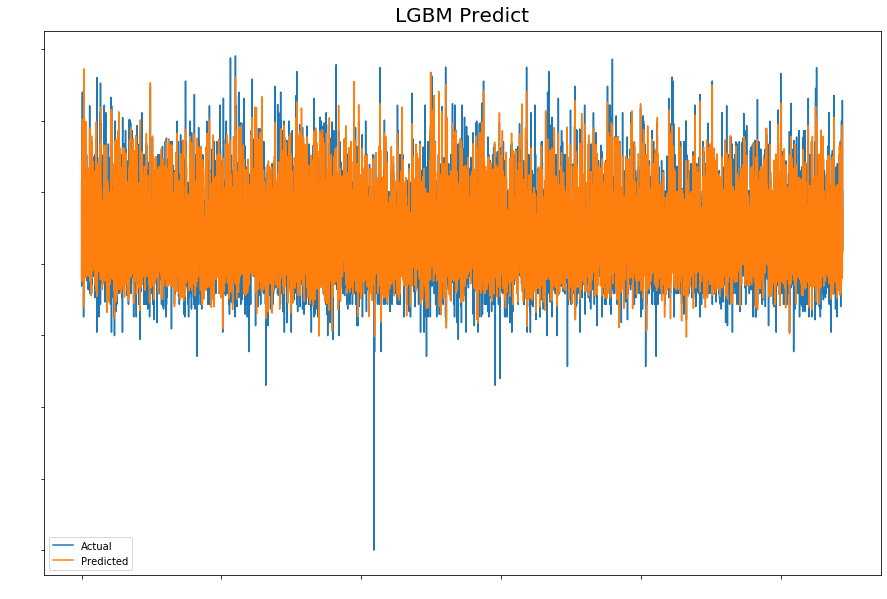

In [170]:
plt.figure(figsize=(15, 10))
plt.plot(y_test_scal.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xticks(color='w') 
plt.yticks(color='w') 
plt.ylabel('Price', color='w', size=20)
plt.title('LGBM Predict', fontsize=20, pad=10)
plt.show()

In [171]:
predict_price = y_test_scal.copy()
predict_price = pd.DataFrame(predict_price)
predict_price['Predict'] = y_pred
predict_price

Price   Predict
38338  5.141664  4.916660
53354  3.688879  3.753853
32059  4.532599  4.373907
18809  3.931826  4.003782
748    5.916202  5.440200
...         ...       ...
51727  5.017280  4.800951
44645  4.189655  3.888173
34691  6.282267  5.933025
49108  4.189655  4.139804
1697   5.017280  4.801121

[10885 rows x 2 columns]

In [172]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [173]:
best_lgbm_model[1]

SimpleImputer(strategy='median')

In [175]:
preprocess_pipeline = best_lgbm_model[:1]
X_test_preprocessed = preprocess_pipeline.transform(X_test_scal)
model = best_lgbm_model[3]

In [176]:
X_test_preprocessed['Review Scores Rating'] = X_test_preprocessed['Review Scores Rating'].fillna(X_test_preprocessed['Review Scores Rating'].median())
X_test_preprocessed

Neighbourhood_1  Neighbourhood_2  Neighbourhood_3  Neighbourhood_4  \
38338                0                0                0                0   
53354                0                0                0                0   
32059                0                0                0                0   
18809                0                0                0                0   
748                  0                0                0                0   
...                ...              ...              ...              ...   
51727                0                0                0                0   
44645                0                0                0                0   
34691                0                0                0                0   
49108                0                0                1                0   
1697                 0                0                0                0   

       Neighbourhood_5  Neighbourhood_6  Neighbourhood_7  Neighbourhood_8  \
38338                0                0                1                0   
53354                0                0                0                0   
32059                0                0                0                0   
18809                0                0                0                0   
748                  0                0                0                0   
...                ...              ...              ...              ...   
51727                0                0                0                0   
44645                0                0                0                0   
34691                0                0                0                0   
49108                0                0                0                0   
1697                 0                0                0                0   

       Neighbourhood_9  Neighbourhood_10  Neighbourhood_11  Neighbourhood_12  \
38338                0                 0                 0                 0   
53354                0                 0                 0                 0   
32059                0                 0                 0                 0   
18809                0                 0                 0                 0   
748                  0                 1                 0                 0   
...                ...               ...               ...               ...   
51727                0                 0                 0                 0   
44645                0                 0                 0                 0   
34691                0                 0                 0                 0   
49108                0                 0                 0                 0   
1697                 0                 0                 0                 0   

       Neighbourhood_13  Neighbourhood_14  Neighbourhood_15  Neighbourhood_16  \
38338                 0                 0                 0                 0   
53354                 0                 0                 0                 0   
32059                 0                 0                 0                 0   
18809                 0                 0                 0                 0   
748                   0                 0                 0                 0   
...                 ...               ...               ...               ...   
51727                 0                 0                 0                 0   
44645                 0                 0                 0                 0   
34691                 0                 0                 0                 1   
49108                 0                 0                 0                 0   
1697                  1                 0                 0                 0   

       Neighbourhood_17  Neighbourhood_18  Neighbourhood_19  Neighbourhood_20  \
38338                 0                 0                 0                 0   
53354                 0                 0                 0  

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feaac6179d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feaac5eac90>})

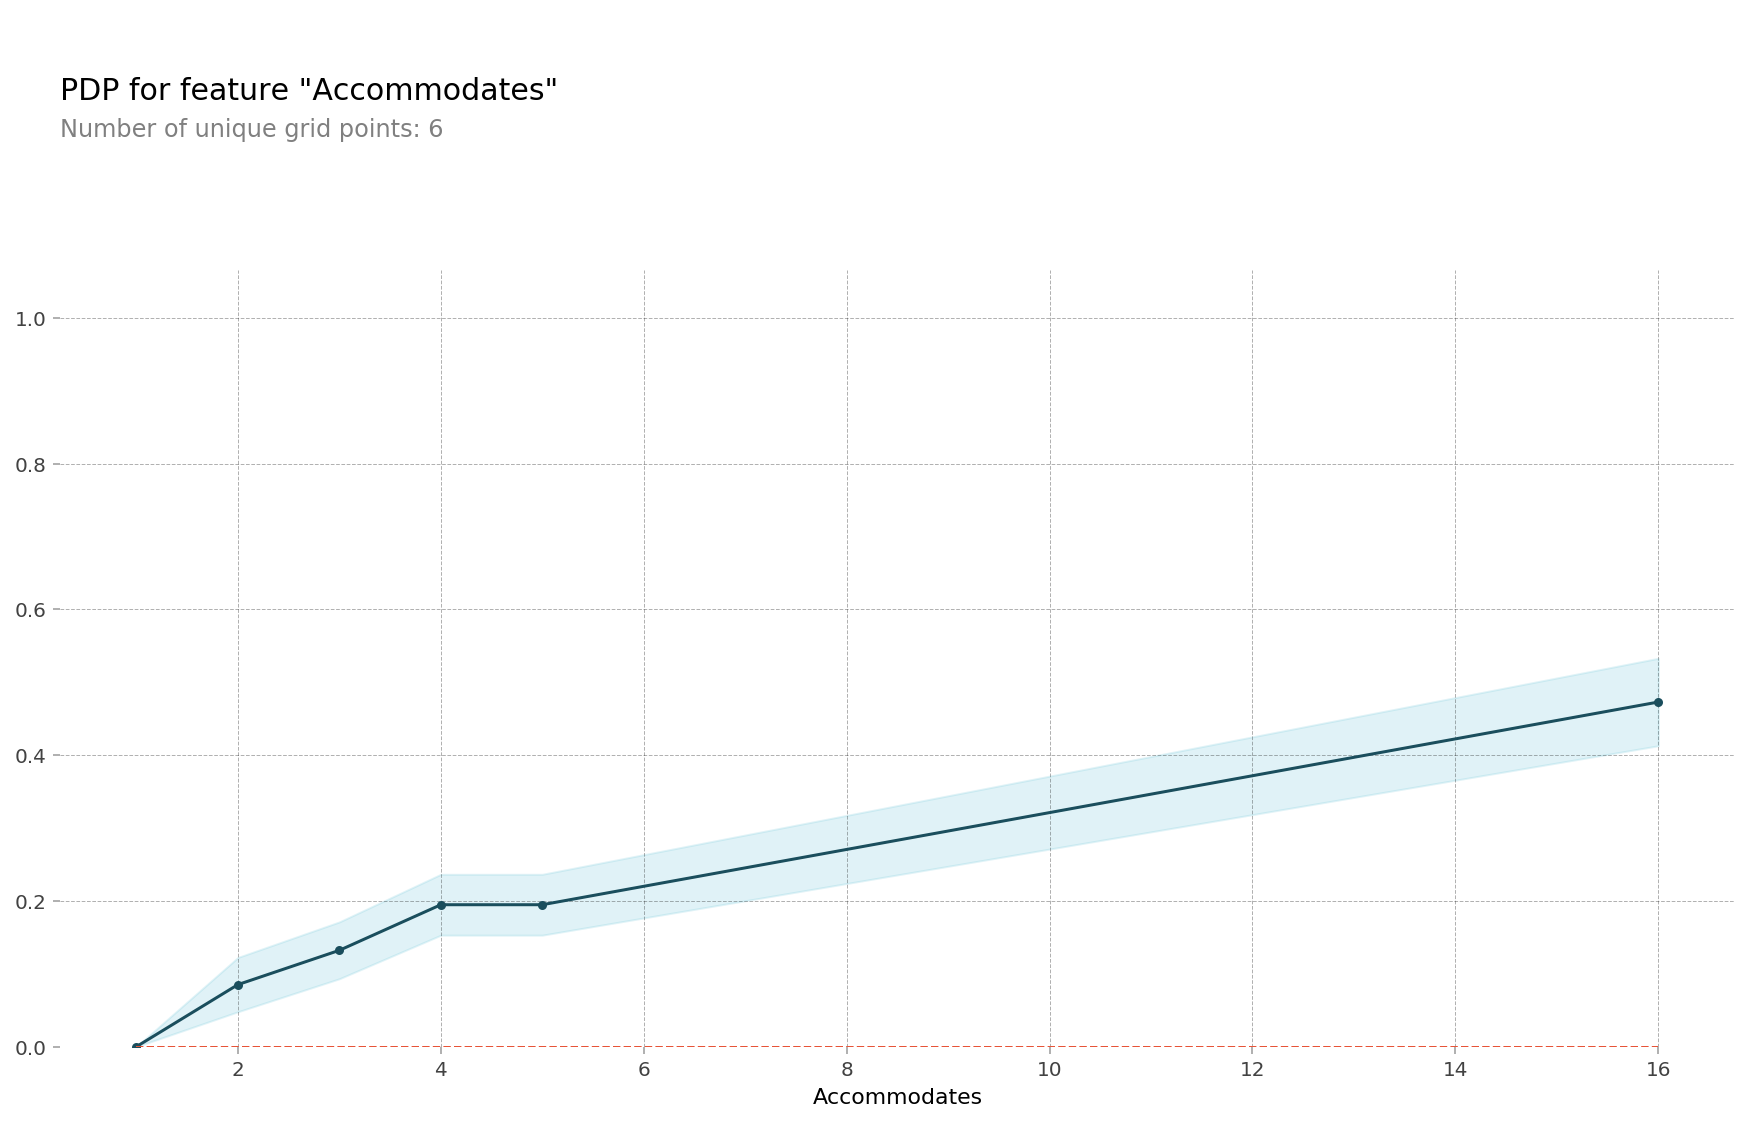

In [191]:
plt.rcParams["figure.dpi"] = 144

target_feature = "Accommodates"

isolated = pdp_isolate(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,    # default = 'percentile', or 'equal'
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feabea749d0>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feabea3a910>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feabea52ed0>}})

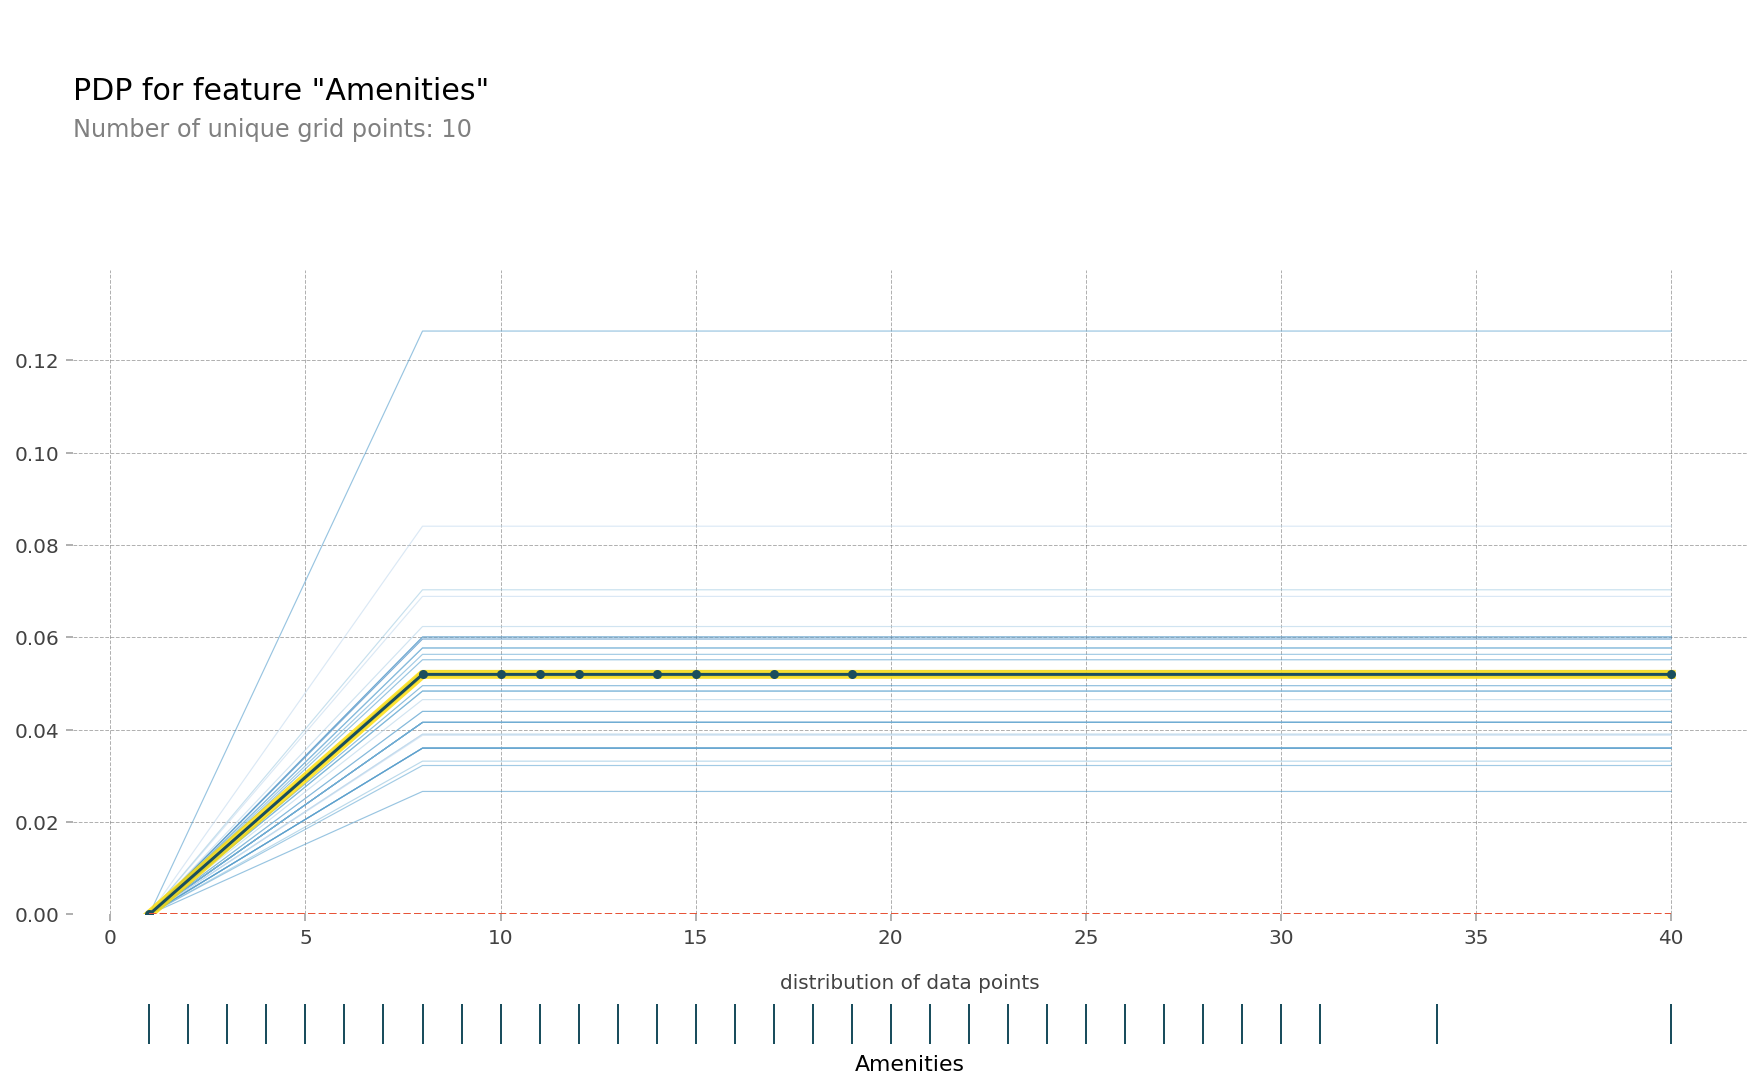

In [179]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

(<Figure size 2160x1368 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feaac8502d0>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feaac7d0310>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feaac774a10>}})

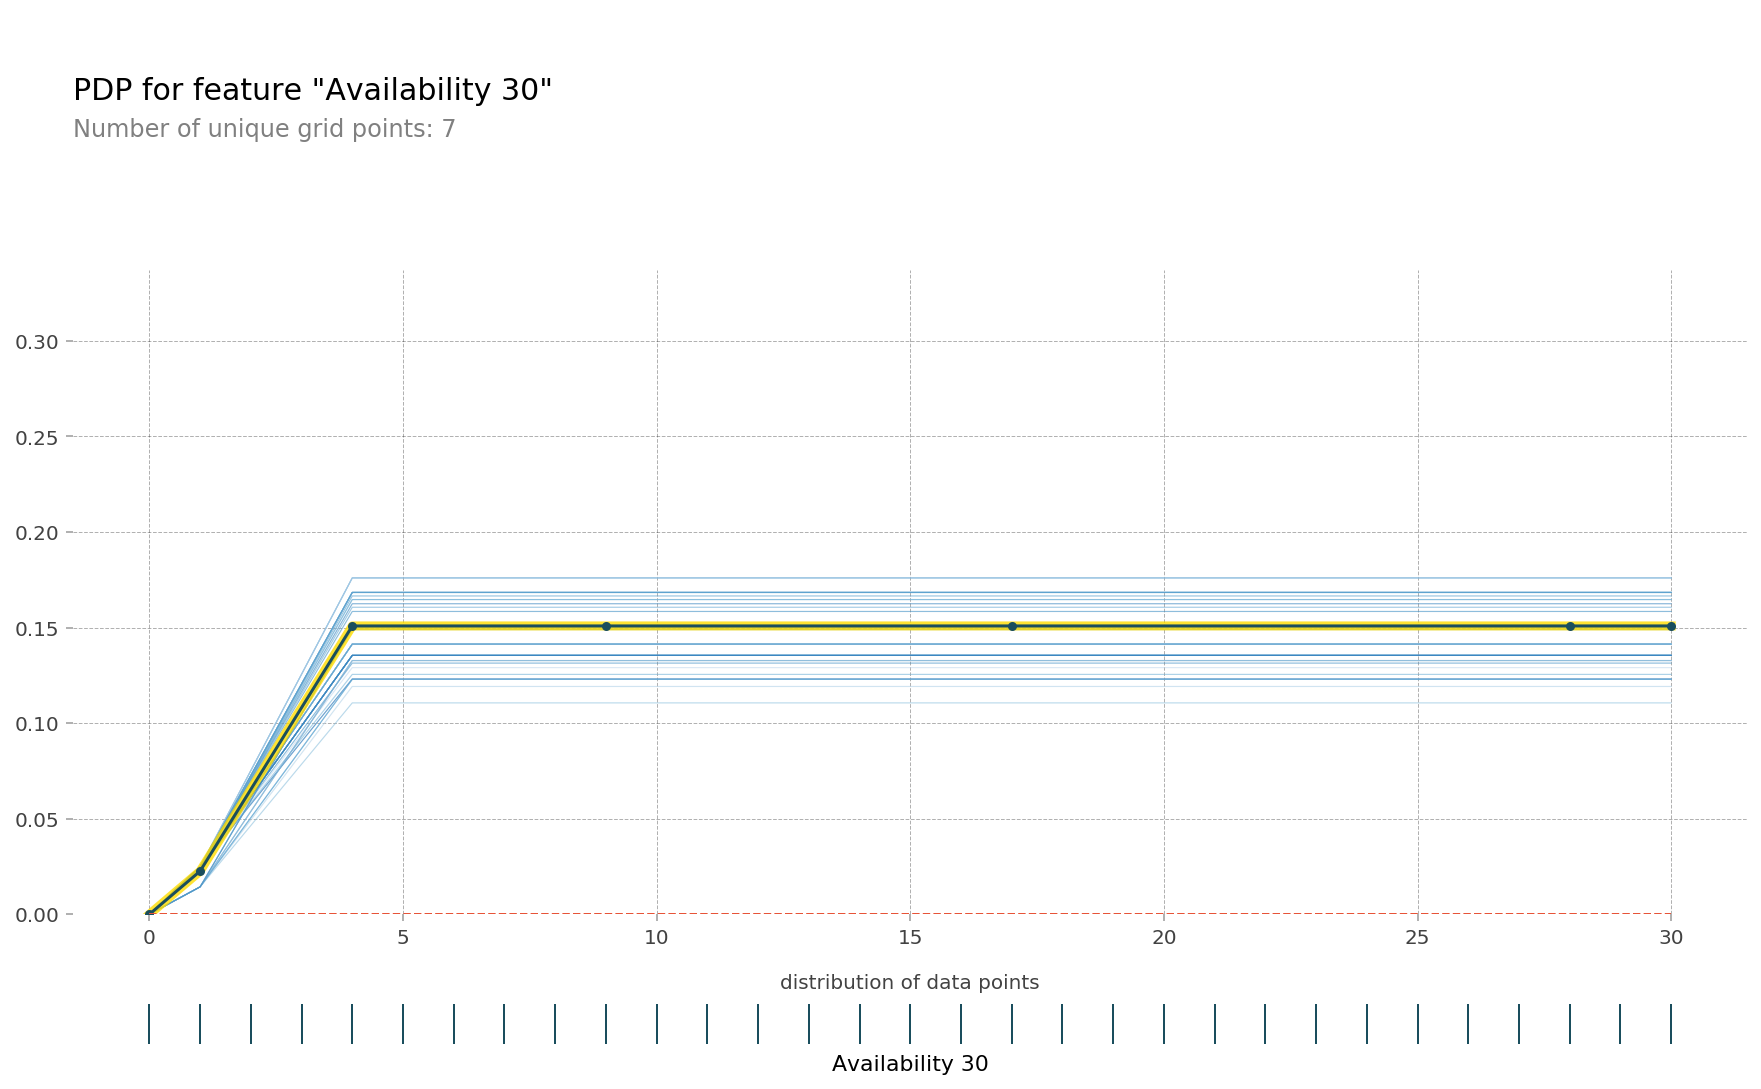

In [185]:
plt.rcParams["figure.dpi"] = 144

target_feature = "Availability 30"

isolated = pdp_isolate(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,    # default = 'percentile', or 'equal'
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [188]:
plt.rcParams["figure.dpi"] = 144

target_feature = "Review Scores Cleanliness"

isolated = pdp_isolate(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,    # default = 'percentile', or 'equal'
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

ValueError: ignored

In [184]:
target_feature = ['Bed Type_1','Bed Type_2', 'Bed Type_3', 'Bed Type_4', 'Bed Type_5']

mappings = best_lgbm_model[0].mapping
mapping_data = list(filter(lambda x: x["col"] == target_feature, mappings))
maps = mapping_data[0]["mapping"]
print(type(maps))
print(maps)

TypeError: ignored

In [182]:
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    feature=target_feature,
    cust_grid_points=[-2, -1, 1, 2, 3, 4, 5],  # 특성값을 찍어 볼 지점을 직접 지정할 수 있습니다.
)
pdp_plot(pdp_dist, target_feature)  # 인코딩된 marital-status 값을 확인할 수 있습니다


ValueError: ignored

(<Figure size 2160x1368 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2bd9f7c50>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2bd994890>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa2bd9b9290>}})

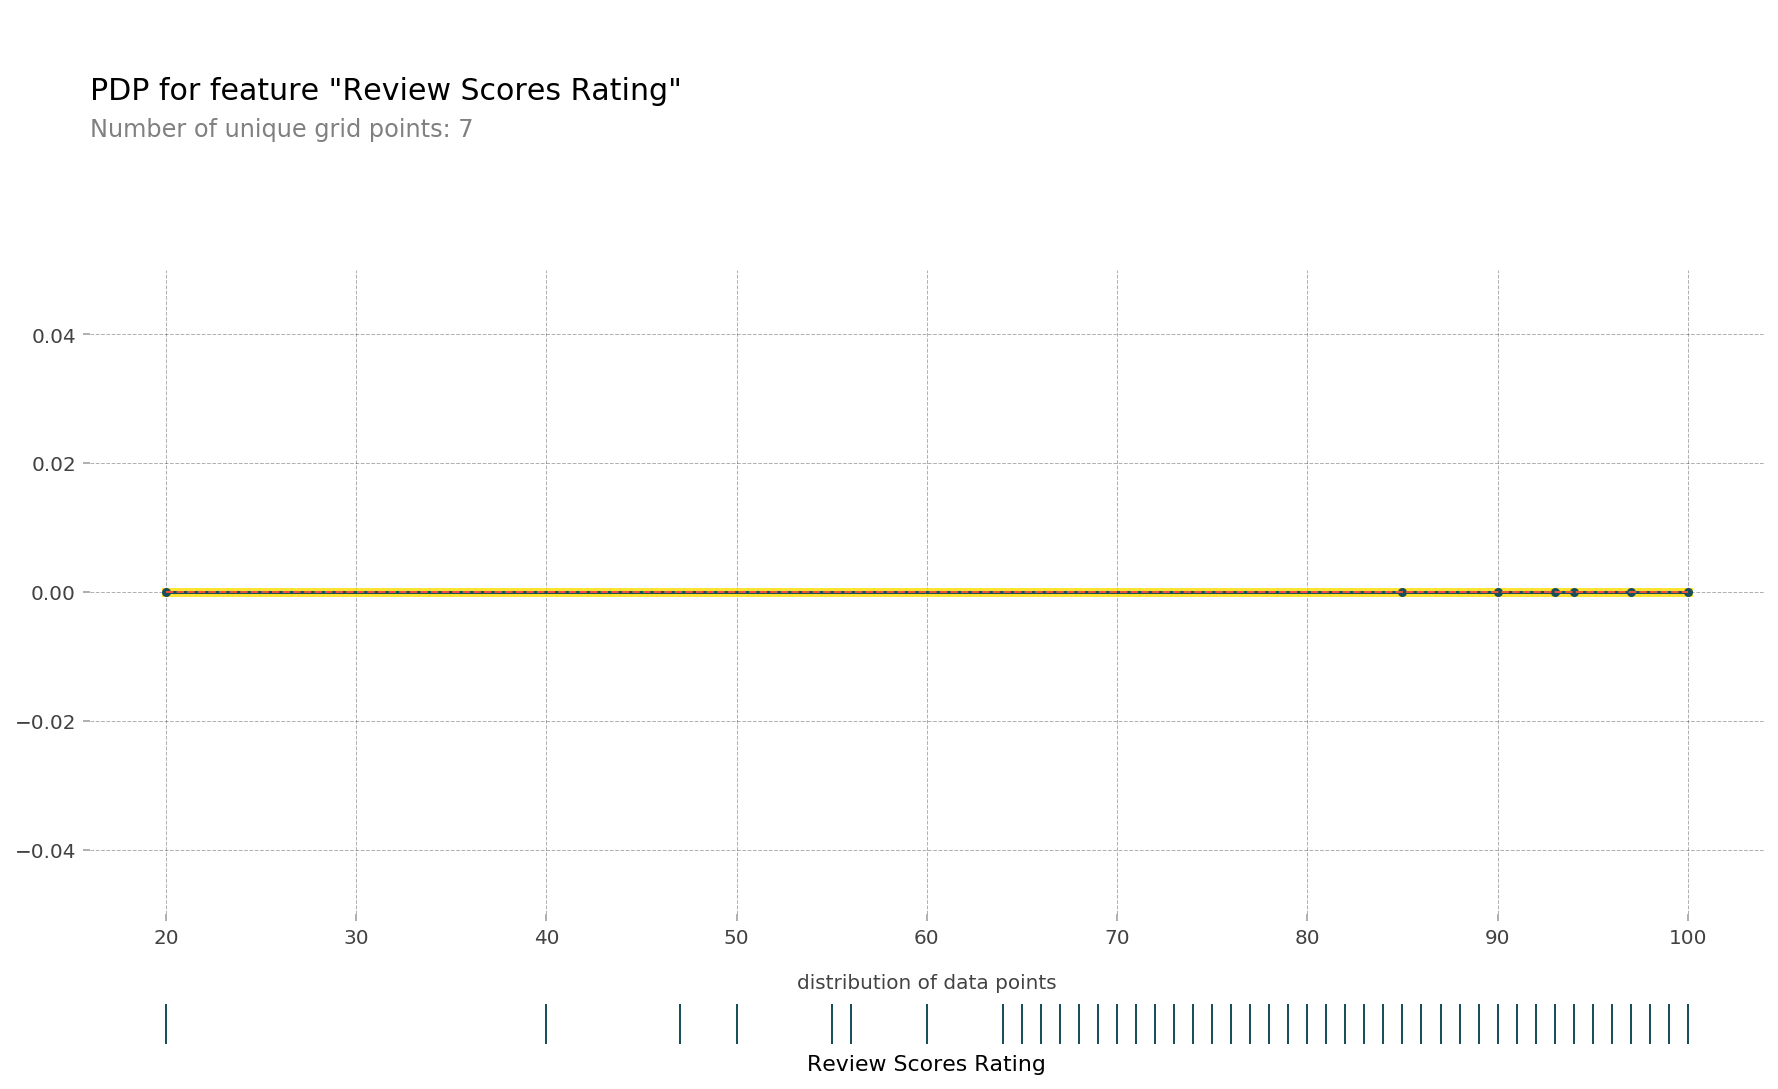

In [ ]:


plt.rcParams["figure.dpi"] = 144

isolated = pdp_isolate(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,  
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True, 
    frac_to_plot=50,  
    plot_pts_dist=True,
)

In [ ]:
from pdpbox import get_dataset, info_plots

In [ ]:
"""
arget_features = ["Review Scores Rating", "Amenities"]

interaction = pdp_interact(
    model=model,
    dataset=X_test_preprocessed,
    model_features=X_test_preprocessed.columns,
    features=target_features,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
"""

'\narget_features = ["Review Scores Rating", "Amenities"]\n\ninteraction = pdp_interact(\n    model=model,\n    dataset=X_test_preprocessed,\n    model_features=X_test_preprocessed.columns,\n    features=target_features,\n)\npdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)\n'

In [ ]:
X_test_preprocessed

Neighbourhood_1  Neighbourhood_2  Neighbourhood_3  Neighbourhood_4  \
45484                0                0                0                0   
44042                0                1                0                0   
5913                 0                0                0                0   
36156                0                0                0                0   
13531                0                0                0                0   
...                ...              ...              ...              ...   
17831                0                0                0                0   
5789                 0                0                0                0   
41935                0                0                0                0   
16467                0                0                0                0   
42322                0                0                0                0   

       Neighbourhood_5  Neighbourhood_6  Neighbourhood_7  Neighbourhood_8  \
45484                0                0                0                0   
44042                0                0                0                0   
5913                 0                0                0                0   
36156                0                0                0                0   
13531                1                0                0                0   
...                ...              ...              ...              ...   
17831                0                0                0                0   
5789                 0                0                0                0   
41935                0                0                0                0   
16467                0                0                0                0   
42322                0                0                0                0   

       Neighbourhood_9  Neighbourhood_10  Neighbourhood_11  Neighbourhood_12  \
45484                0                 0                 0                 0   
44042                0                 0                 0                 0   
5913                 0                 0                 0                 0   
36156                0                 0                 0                 0   
13531                0                 0                 0                 0   
...                ...               ...               ...               ...   
17831                0                 0                 1                 0   
5789                 0                 0                 0                 0   
41935                0                 0                 0                 0   
16467                0                 1                 0                 0   
42322                0                 0                 0                 0   

       Neighbourhood_13  Neighbourhood_14  Neighbourhood_15  Neighbourhood_16  \
45484                 0                 0                 0                 0   
44042                 0                 0                 0                 0   
5913                  0                 0                 0                 0   
36156                 0                 0                 0                 0   
13531                 0                 0                 0                 0   
...                 ...               ...               ...               ...   
17831                 0                 0                 0                 0   
5789                  0                 0                 0                 0   
41935                 0                 0                 0                 0   
16467                 0                 0                 0                 0   
42322                 0                 0                 0                 0   

       Neighbourhood_17  Neighbourhood_18  Neighbourhood_19  Neighbourhood_20  \
45484                 0                 0                 0                 0   
44042                 0                 0                 0  

In [ ]:
"""
target_feature = 'Review Scores Value'

plt.rcParams["figure.dpi"] = 144

isolated = pdp_isolate(
    model=model,
    dataset=X_test_scal,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,  
)

pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True, 
    frac_to_plot=50,  
    plot_pts_dist=True,
)
"""

'\ntarget_feature = \'Review Scores Value\'\n\nplt.rcParams["figure.dpi"] = 144\n\nisolated = pdp_isolate(\n    model=model,\n    dataset=X_test_scal,\n    model_features=X_test.columns,\n    feature=target_feature,\n    grid_type="percentile",\n    num_grid_points=10,  \n)\n\npdp_plot(\n    isolated,\n    feature_name=target_feature,\n    plot_lines=True, \n    frac_to_plot=50,  \n    plot_pts_dist=True,\n)\n'